Predicting App Ratings on the Google Play Store

# Data Dictionary

- App: Name of the app
- Category: Category of the app e.g. ART_AND_DESIGN, FINANCE, COMICS, BEAUTY
- Rating: The current average rating (out of 5) of the app on Google Play
- Reviews: Number of user reviews given on the app
- Size: Size of the app in MB (megabytes) or KB (kilobytes)
- Installs: Number of times the app was downloaded from Google Play
- Type: Whether the app is paid or free
- Price: Price of the app in US$
- Last Updated: Date on which the app was last updated on Google Play
- Android ver:
- Current ver: 

# Import Libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import re

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Read in the Data

In [7]:
# read in the data
gps_csv = "googleplaystore.csv"

df = pd.read_csv(gps_csv)

# Exploratory Data Analysis

In [9]:
df.shape

(10841, 13)

In [10]:
df.head().T

,0,1,2,3,4
App,Photo Editor & Candy Camera & Grid & ScrapBook,Coloring book moana,"U Launcher Lite – FREE Live Cool Themes, Hide ...",Sketch - Draw & Paint,Pixel Draw - Number Art Coloring Book
Category,ART_AND_DESIGN,ART_AND_DESIGN,ART_AND_DESIGN,ART_AND_DESIGN,ART_AND_DESIGN
Rating,4.1,3.9,4.7,4.5,4.3
Reviews,159,967,87510,215644,967
Size,19M,14M,8.7M,25M,2.8M
Installs,"10,000+","500,000+","5,000,000+","50,000,000+","100,000+"
Type,Free,Free,Free,Free,Free
Price,0,0,0,0,0
Content Rating,Everyone,Everyone,Everyone,Teen,Everyone
Genres,Art & Design,Art & Design;Pretend Play,Art & Design,Art & Design,Art & Design;Creativity


In [11]:
df.tail().T

,10836,10837,10838,10839,10840
App,Sya9a Maroc - FR,Fr. Mike Schmitz Audio Teachings,Parkinson Exercices FR,The SCP Foundation DB fr nn5n,iHoroscope - 2018 Daily Horoscope & Astrology
Category,FAMILY,FAMILY,MEDICAL,BOOKS_AND_REFERENCE,LIFESTYLE
Rating,4.5,5.0,NaN,4.5,4.5
Reviews,38,4,3,114,398307
Size,53M,3.6M,9.5M,Varies with device,19M
Installs,"5,000+",100+,"1,000+","1,000+","10,000,000+"
Type,Free,Free,Free,Free,Free
Price,0,0,0,0,0
Content Rating,Everyone,Everyone,Everyone,Mature 17+,Everyone
Genres,Education,Education,Medical,Books & Reference,Lifestyle


In [12]:
df.sample(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
5809,Workflow Approvals App AX 2012,BUSINESS,NaN,2,3.0M,100+,Free,0,Everyone,Business,"July 12, 2018",1.6(3)-demo,4.0.3 and up
9955,Simple EV Calc,PRODUCTIVITY,4.2,105,72M,"1,000+",Free,0,Everyone,Productivity,"October 16, 2017",2.2.2,4.4 and up
6362,BK Murli Offline April 2017,LIFESTYLE,4.8,33,2.4M,"5,000+",Free,0,Everyone,Lifestyle,"May 3, 2017",1.0,4.0.3 and up
4685,HD Video Downloader : 2018 Best video mate,VIDEO_PLAYERS,3.7,430643,4.9M,"50,000,000+",Free,0,Everyone,Video Players & Editors,"May 31, 2018",2.5.0,4.1 and up
5480,Glanceable Ap Watch Face,PERSONALIZATION,NaN,0,11M,5+,Paid,$0.99,Everyone,Personalization,"August 14, 2016",1.0.103,4.4 and up
3755,Flipboard: News For Our Time,NEWS_AND_MAGAZINES,4.4,1284017,Varies with device,"500,000,000+",Free,0,Everyone 10+,News & Magazines,"August 3, 2018",Varies with device,Varies with device
669,Find Lover,DATING,NaN,21,4.7M,"1,000+",Free,0,Mature 17+,Dating,"July 27, 2018",1.0.2,4.0.3 and up
6068,Free GPS Navigation,MAPS_AND_NAVIGATION,4.2,618562,Varies with device,"50,000,000+",Free,0,Everyone,Maps & Navigation,"June 4, 2018",Varies with device,Varies with device
6618,bpresso PRO,MEDICAL,4.4,515,Varies with device,"1,000+",Paid,$5.49,Everyone,Medical,"April 19, 2017",Varies with device,Varies with device
859,YouTube Kids,ENTERTAINMENT,4.5,470089,Varies with device,"50,000,000+",Free,0,Everyone,Entertainment;Music & Video,"August 3, 2018",3.43.3,4.1 and up


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [14]:
# 12 objects, 1 float.

In [15]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [16]:
for col in df.columns:
    print(col, df[col].nunique())

App 9660
Category 34
Rating 40
Reviews 6002
Size 462
Installs 22
Type 3
Price 93
Content Rating 6
Genres 120
Last Updated 1378
Current Ver 2832
Android Ver 33


In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rating,9367.0,4.193338,0.537431,1.0,4.0,4.3,4.5,19.0


# Data Pre-Processing and Visualisations

In [19]:
# I will need to action some of the above before I can do deeper EDA
# Let's go column by column

## Category

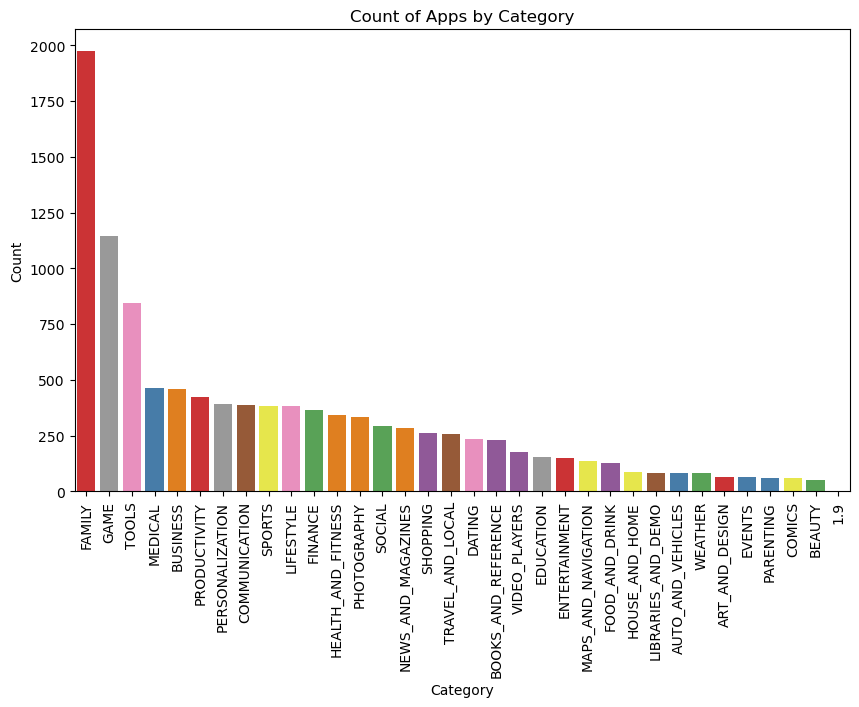

In [21]:
# Create a figure for the bar plot
plt.figure(figsize=(10, 6))

# Plotting the bar plot using Seaborn
sns.countplot(data=df, x='Category', palette='Set1', hue='Category', legend=False, order=df['Category'].value_counts().index)

# Set the labels and title
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Count of Apps by Category')

# Display the plot
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.show()

In [22]:
# Family and Game are the most common apps in the play store.

In [23]:
category_list = df['Category'].unique().tolist()
category_list = ['cat_' + word for word in category_list]
df = pd.concat([df, pd.get_dummies(df['Category'], prefix = 'cat')], axis = 1)
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,...,cat_PERSONALIZATION,cat_PHOTOGRAPHY,cat_PRODUCTIVITY,cat_SHOPPING,cat_SOCIAL,cat_SPORTS,cat_TOOLS,cat_TRAVEL_AND_LOCAL,cat_VIDEO_PLAYERS,cat_WEATHER
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,...,False,False,False,False,False,False,False,False,False,False
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,...,False,False,False,False,False,False,False,False,False,False
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,...,False,False,False,False,False,False,False,False,False,False
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,...,False,False,False,False,False,False,False,False,False,False
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,...,False,False,False,False,False,False,False,False,False,False


## Rating

In [25]:
df['Rating'].unique

<bound method Series.unique of 0        4.1
1        3.9
2        4.7
3        4.5
4        4.3
        ... 
10836    4.5
10837    5.0
10838    NaN
10839    4.5
10840    4.5
Name: Rating, Length: 10841, dtype: float64>

In [26]:
# Print unique values in a specific column
df['Rating'].unique()

array([ 4.1,  3.9,  4.7,  4.5,  4.3,  4.4,  3.8,  4.2,  4.6,  3.2,  4. ,
        nan,  4.8,  4.9,  3.6,  3.7,  3.3,  3.4,  3.5,  3.1,  5. ,  2.6,
        3. ,  1.9,  2.5,  2.8,  2.7,  1. ,  2.9,  2.3,  2.2,  1.7,  2. ,
        1.8,  2.4,  1.6,  2.1,  1.4,  1.5,  1.2, 19. ])

In [27]:
# So we just have numbers and 'nans' and the data is already a 'float' type.
# But need to look into that row with a rating of 19.

# Find rows where 'Rating' is greater than 5 and not NaN
rows_with_high_rating = df[(df['Rating'] > 5) & (df['Rating'].notna())]

# Display the rows
print(rows_with_high_rating)

                                           App Category  Rating Reviews  \
10472  Life Made WI-Fi Touchscreen Photo Frame      1.9    19.0    3.0M   

         Size Installs Type     Price Content Rating             Genres  ...  \
10472  1,000+     Free    0  Everyone            NaN  February 11, 2018  ...   

      cat_PERSONALIZATION cat_PHOTOGRAPHY cat_PRODUCTIVITY  cat_SHOPPING  \
10472               False           False            False         False   

       cat_SOCIAL  cat_SPORTS  cat_TOOLS  cat_TRAVEL_AND_LOCAL  \
10472       False       False      False                 False   

       cat_VIDEO_PLAYERS  cat_WEATHER  
10472              False        False  

[1 rows x 47 columns]


In [28]:
# Aha!  The data in this row is misaligned.  For example, the Category = 1.9 and the Genres is a date.
# I will remove this row from the dataframe.

df = df.drop(10472)


In [29]:
# What did dropping that row do to the 'info'
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 47 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   App                      10840 non-null  object 
 1   Category                 10840 non-null  object 
 2   Rating                   9366 non-null   float64
 3   Reviews                  10840 non-null  object 
 4   Size                     10840 non-null  object 
 5   Installs                 10840 non-null  object 
 6   Type                     10839 non-null  object 
 7   Price                    10840 non-null  object 
 8   Content Rating           10840 non-null  object 
 9   Genres                   10840 non-null  object 
 10  Last Updated             10840 non-null  object 
 11  Current Ver              10832 non-null  object 
 12  Android Ver              10838 non-null  object 
 13  cat_1.9                  10840 non-null  bool   
 14  cat_ART_AND_DESIGN       10

In [30]:
df.isnull().sum()

App                           0
Category                      0
Rating                     1474
Reviews                       0
Size                          0
Installs                      0
Type                          1
Price                         0
Content Rating                0
Genres                        0
Last Updated                  0
Current Ver                   8
Android Ver                   2
cat_1.9                       0
cat_ART_AND_DESIGN            0
cat_AUTO_AND_VEHICLES         0
cat_BEAUTY                    0
cat_BOOKS_AND_REFERENCE       0
cat_BUSINESS                  0
cat_COMICS                    0
cat_COMMUNICATION             0
cat_DATING                    0
cat_EDUCATION                 0
cat_ENTERTAINMENT             0
cat_EVENTS                    0
cat_FAMILY                    0
cat_FINANCE                   0
cat_FOOD_AND_DRINK            0
cat_GAME                      0
cat_HEALTH_AND_FITNESS        0
cat_HOUSE_AND_HOME            0
cat_LIBR

In [31]:
# The missing 'Content Rating' has been accounted for.  Still one missing 'Type' and 1474 Ratings.

In [32]:
#Convert Rating to numeric
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

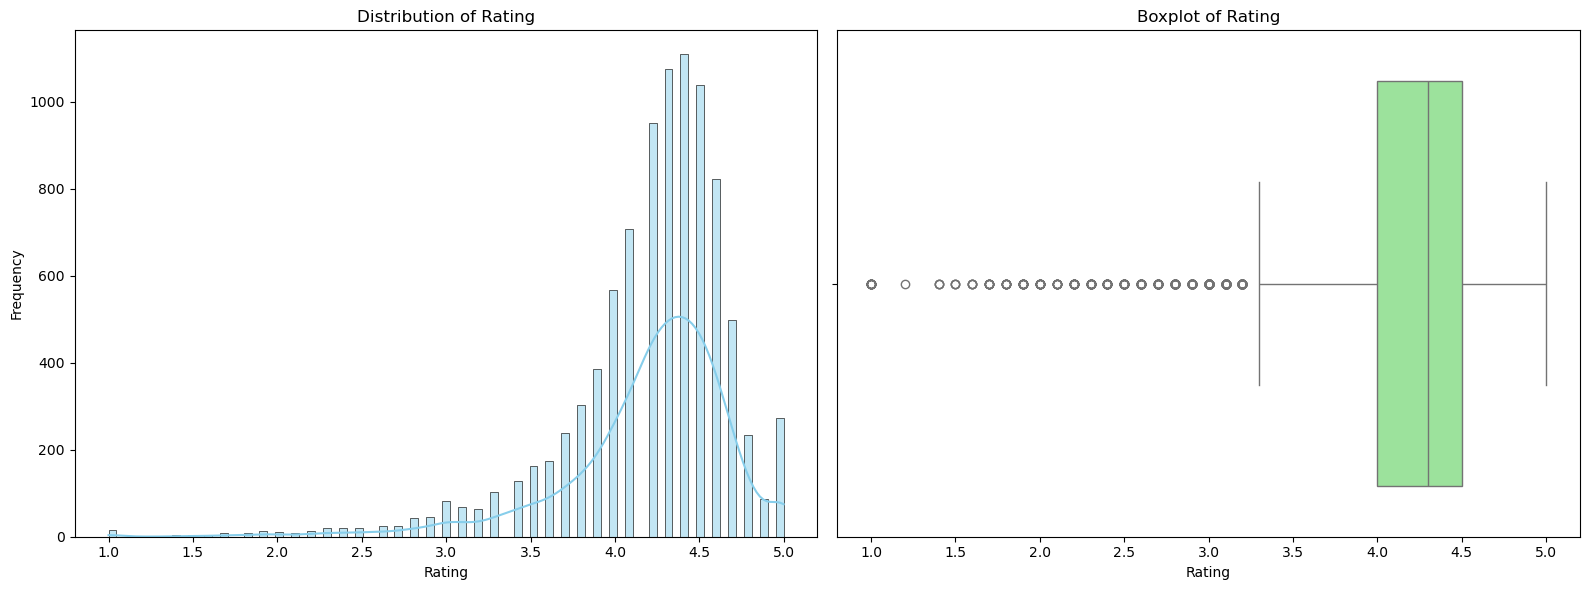

In [33]:
# Create a figure and a grid of subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plotting histplot using seaborn
sns.histplot(df['Rating'], ax=axes[0], kde=True, color='skyblue')
axes[0].set_xlabel('Rating')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Rating')

# Create the boxplot using Seaborn
# Plotting boxplot using seaborn
sns.boxplot(data=df, x='Rating', ax=axes[1], color='lightgreen')
axes[1].set_title('Boxplot of Rating')

plt.tight_layout()  # Ensure plots are neatly arranged
plt.show()

In [34]:
# Skewed left
# Majority of ratings are towards the higher end (4+)

In [35]:
# There are 1474 missing Ratings.
# I cannot think how to impute a rating based on another feature without risking data leakage.
# I could either enter the Mean / Median value or drop the missing rows.

In [36]:
# I would prefer to keep the dataset clean and focussed on high-quality entries, do I will delete the missong rows.
df.dropna(subset=['Rating'], inplace=True)

In [37]:
df.shape

(9366, 47)

## Reviews

In [39]:
# No missing data           
#What about unique entries (anything unexpected)? 
unique_values = df['Reviews'].unique()
print(unique_values)

['159' '967' '87510' ... '603' '1195' '398307']


In [40]:
print(df['Reviews'].isna().sum())

0


In [41]:
# Convert to an integer
#df['Reviews'] = df['Reviews'].astype('int')

In [42]:
#Convert Reviews to numeric
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')

In [43]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rating,9366.0,4.191757,5.152189e-01,1.0,4.00,4.3,4.50,5.0
Reviews,9366.0,514049.836536,3.144042e+06,1.0,186.25,5930.5,81532.75,78158306.0


In [44]:
# Reviews successfully converted.

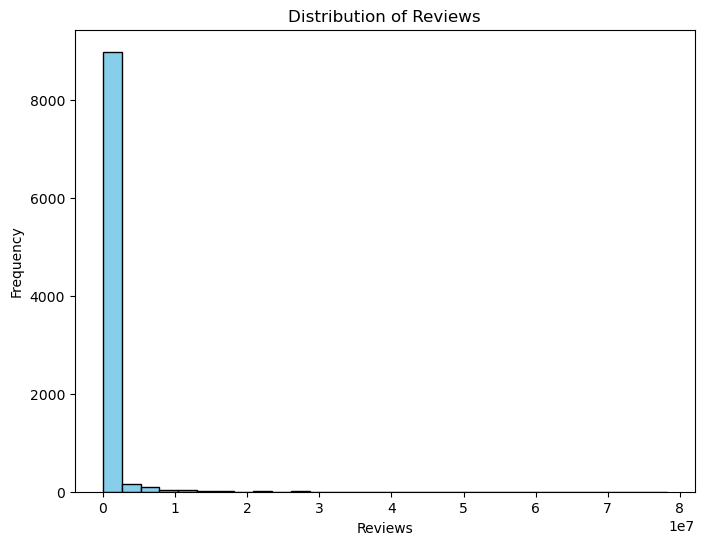

In [45]:
# Plotting histogram separately as data was concentrated in one small part of the chart and it was difficult to read

plt.figure(figsize=(8, 6))
plt.hist(df['Reviews'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Reviews')
plt.ylabel('Frequency')
plt.title('Distribution of Reviews')
plt.show()

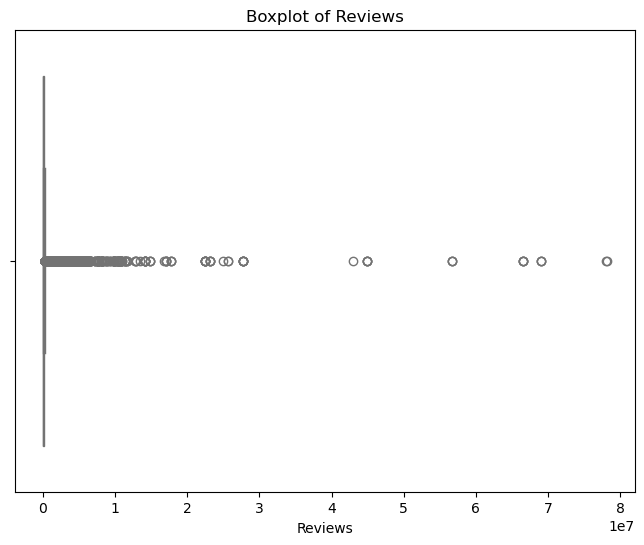

In [46]:
# Create a figure for the boxplot
plt.figure(figsize=(8, 6))

# Create the boxplot using Seaborn
sns.boxplot(data=df, x='Reviews', color='lightgreen')
plt.title('Boxplot of Reviews')
plt.xlabel('Reviews')

# Display the plot
plt.show()

In [47]:
# Mean is around 444k and the max is about 78M reviews....it was either very good or very bad! ;-)

## Size

In [49]:
#What about unique entries (anything unexpected)? 
df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M',
       '11M', '24M', 'Varies with device', '9.4M', '15M', '10M', '1.2M',
       '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k', '3.6M',
       '5.7M', '8.6M', '2.4M', '27M', '2.5M', '7.0M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '22M', '6.4M', '3.2M', '8.2M', '4.9M', '9.5M', '5.0M',
       '5.9M', '13M', '73M', '6.8M', '3.5M', '4.0M', '2.3M', '2.1M',
       '42M', '9.1M', '55M', '23k', '7.3M', '6.5M', '1.5M', '7.5M', '51M',
       '41M', '48M', '8.5M', '46M', '8.3M', '4.3M', '4.7M', '3.3M', '40M',
       '7.8M', '8.8M', '6.6M', '5.1M', '61M', '66M', '79k', '8.4M',
       '3.7M', '118k', '44M', '695k', '1.6M', '6.2M', '53M', '1.4M',
      

In [50]:
# Contains 'M' and 'k' bytes and also 'Varies with device'
# Need to expand the M and k values out into 'true' values so they can be converted to integers
# Any 'varies with device' will be converted to NaN

def convert_into_bytes(column_name):
    if isinstance(column_name, str):
        if 'k' in column_name:
            return float(column_name.replace("k", "")) * 1024
        elif 'M' in column_name:
            return float(column_name.replace("M", "")) * 1024 * 1024
        elif 'Varies with device' in column_name:
            return np.nan
    return column_name

In [51]:
df['Size'] = df['Size'].apply(convert_into_bytes)

In [52]:
df['Size']

0        19922944.0
1        14680064.0
2         9122611.2
3        26214400.0
4         2936012.8
            ...    
10834     2726297.6
10836    55574528.0
10837     3774873.6
10839           NaN
10840    19922944.0
Name: Size, Length: 9366, dtype: float64

In [53]:
# Rename the column
df.rename(columns={'Size': 'Size_in_bytes'}, inplace=True)

In [54]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rating,9366.0,4.191757e+00,5.152189e-01,1.0,4.00,4.3,4.50,5.0
Reviews,9366.0,5.140498e+05,3.144042e+06,1.0,186.25,5930.5,81532.75,78158306.0
Size_in_bytes,7729.0,2.407244e+07,2.458472e+07,8704.0,5557452.80,14680064.0,34603008.00,104857600.0


In [55]:
df.head()

,App,Category,Rating,Reviews,Size_in_bytes,Installs,Type,Price,Content Rating,Genres,...,cat_PERSONALIZATION,cat_PHOTOGRAPHY,cat_PRODUCTIVITY,cat_SHOPPING,cat_SOCIAL,cat_SPORTS,cat_TOOLS,cat_TRAVEL_AND_LOCAL,cat_VIDEO_PLAYERS,cat_WEATHER
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19922944.0,"10,000+",Free,0,Everyone,Art & Design,...,False,False,False,False,False,False,False,False,False,False
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14680064.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,...,False,False,False,False,False,False,False,False,False,False
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,9122611.2,"5,000,000+",Free,0,Everyone,Art & Design,...,False,False,False,False,False,False,False,False,False,False
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,26214400.0,"50,000,000+",Free,0,Teen,Art & Design,...,False,False,False,False,False,False,False,False,False,False
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2936012.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,...,False,False,False,False,False,False,False,False,False,False


In [56]:
# 'Size' column correctly converted and cleaned.

In [57]:
# Check the data type of the Size column
print(df['Size_in_bytes'].dtype)

float64


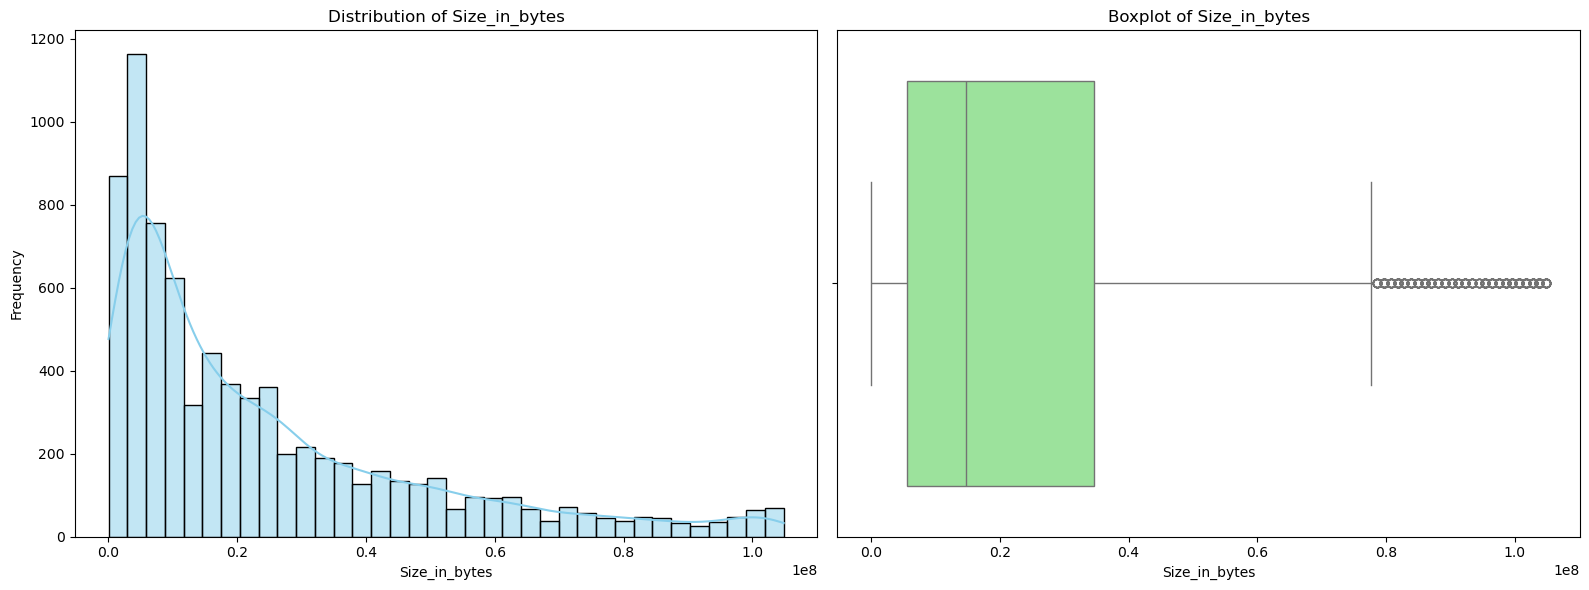

In [58]:
# Create a figure and a grid of subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plotting histplot using seaborn
sns.histplot(df['Size_in_bytes'], ax=axes[0], kde=True, color='skyblue')
axes[0].set_xlabel('Size_in_bytes')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Size_in_bytes')

# Plotting boxplot using seaborn
sns.boxplot(data=df, x='Size_in_bytes', ax=axes[1], color='lightgreen')
axes[1].set_title('Boxplot of Size_in_bytes')

plt.tight_layout()  # Ensure plots are neatly arranged
plt.show()

In [59]:
# Skewed right
# Most of the apps are relatively small, but there are some that are of considerable size.

In [60]:
df.isnull().sum()

App                           0
Category                      0
Rating                        0
Reviews                       0
Size_in_bytes              1637
Installs                      0
Type                          0
Price                         0
Content Rating                0
Genres                        0
Last Updated                  0
Current Ver                   4
Android Ver                   2
cat_1.9                       0
cat_ART_AND_DESIGN            0
cat_AUTO_AND_VEHICLES         0
cat_BEAUTY                    0
cat_BOOKS_AND_REFERENCE       0
cat_BUSINESS                  0
cat_COMICS                    0
cat_COMMUNICATION             0
cat_DATING                    0
cat_EDUCATION                 0
cat_ENTERTAINMENT             0
cat_EVENTS                    0
cat_FAMILY                    0
cat_FINANCE                   0
cat_FOOD_AND_DRINK            0
cat_GAME                      0
cat_HEALTH_AND_FITNESS        0
cat_HOUSE_AND_HOME            0
cat_LIBR

In [61]:
# Still have to deal with missing values

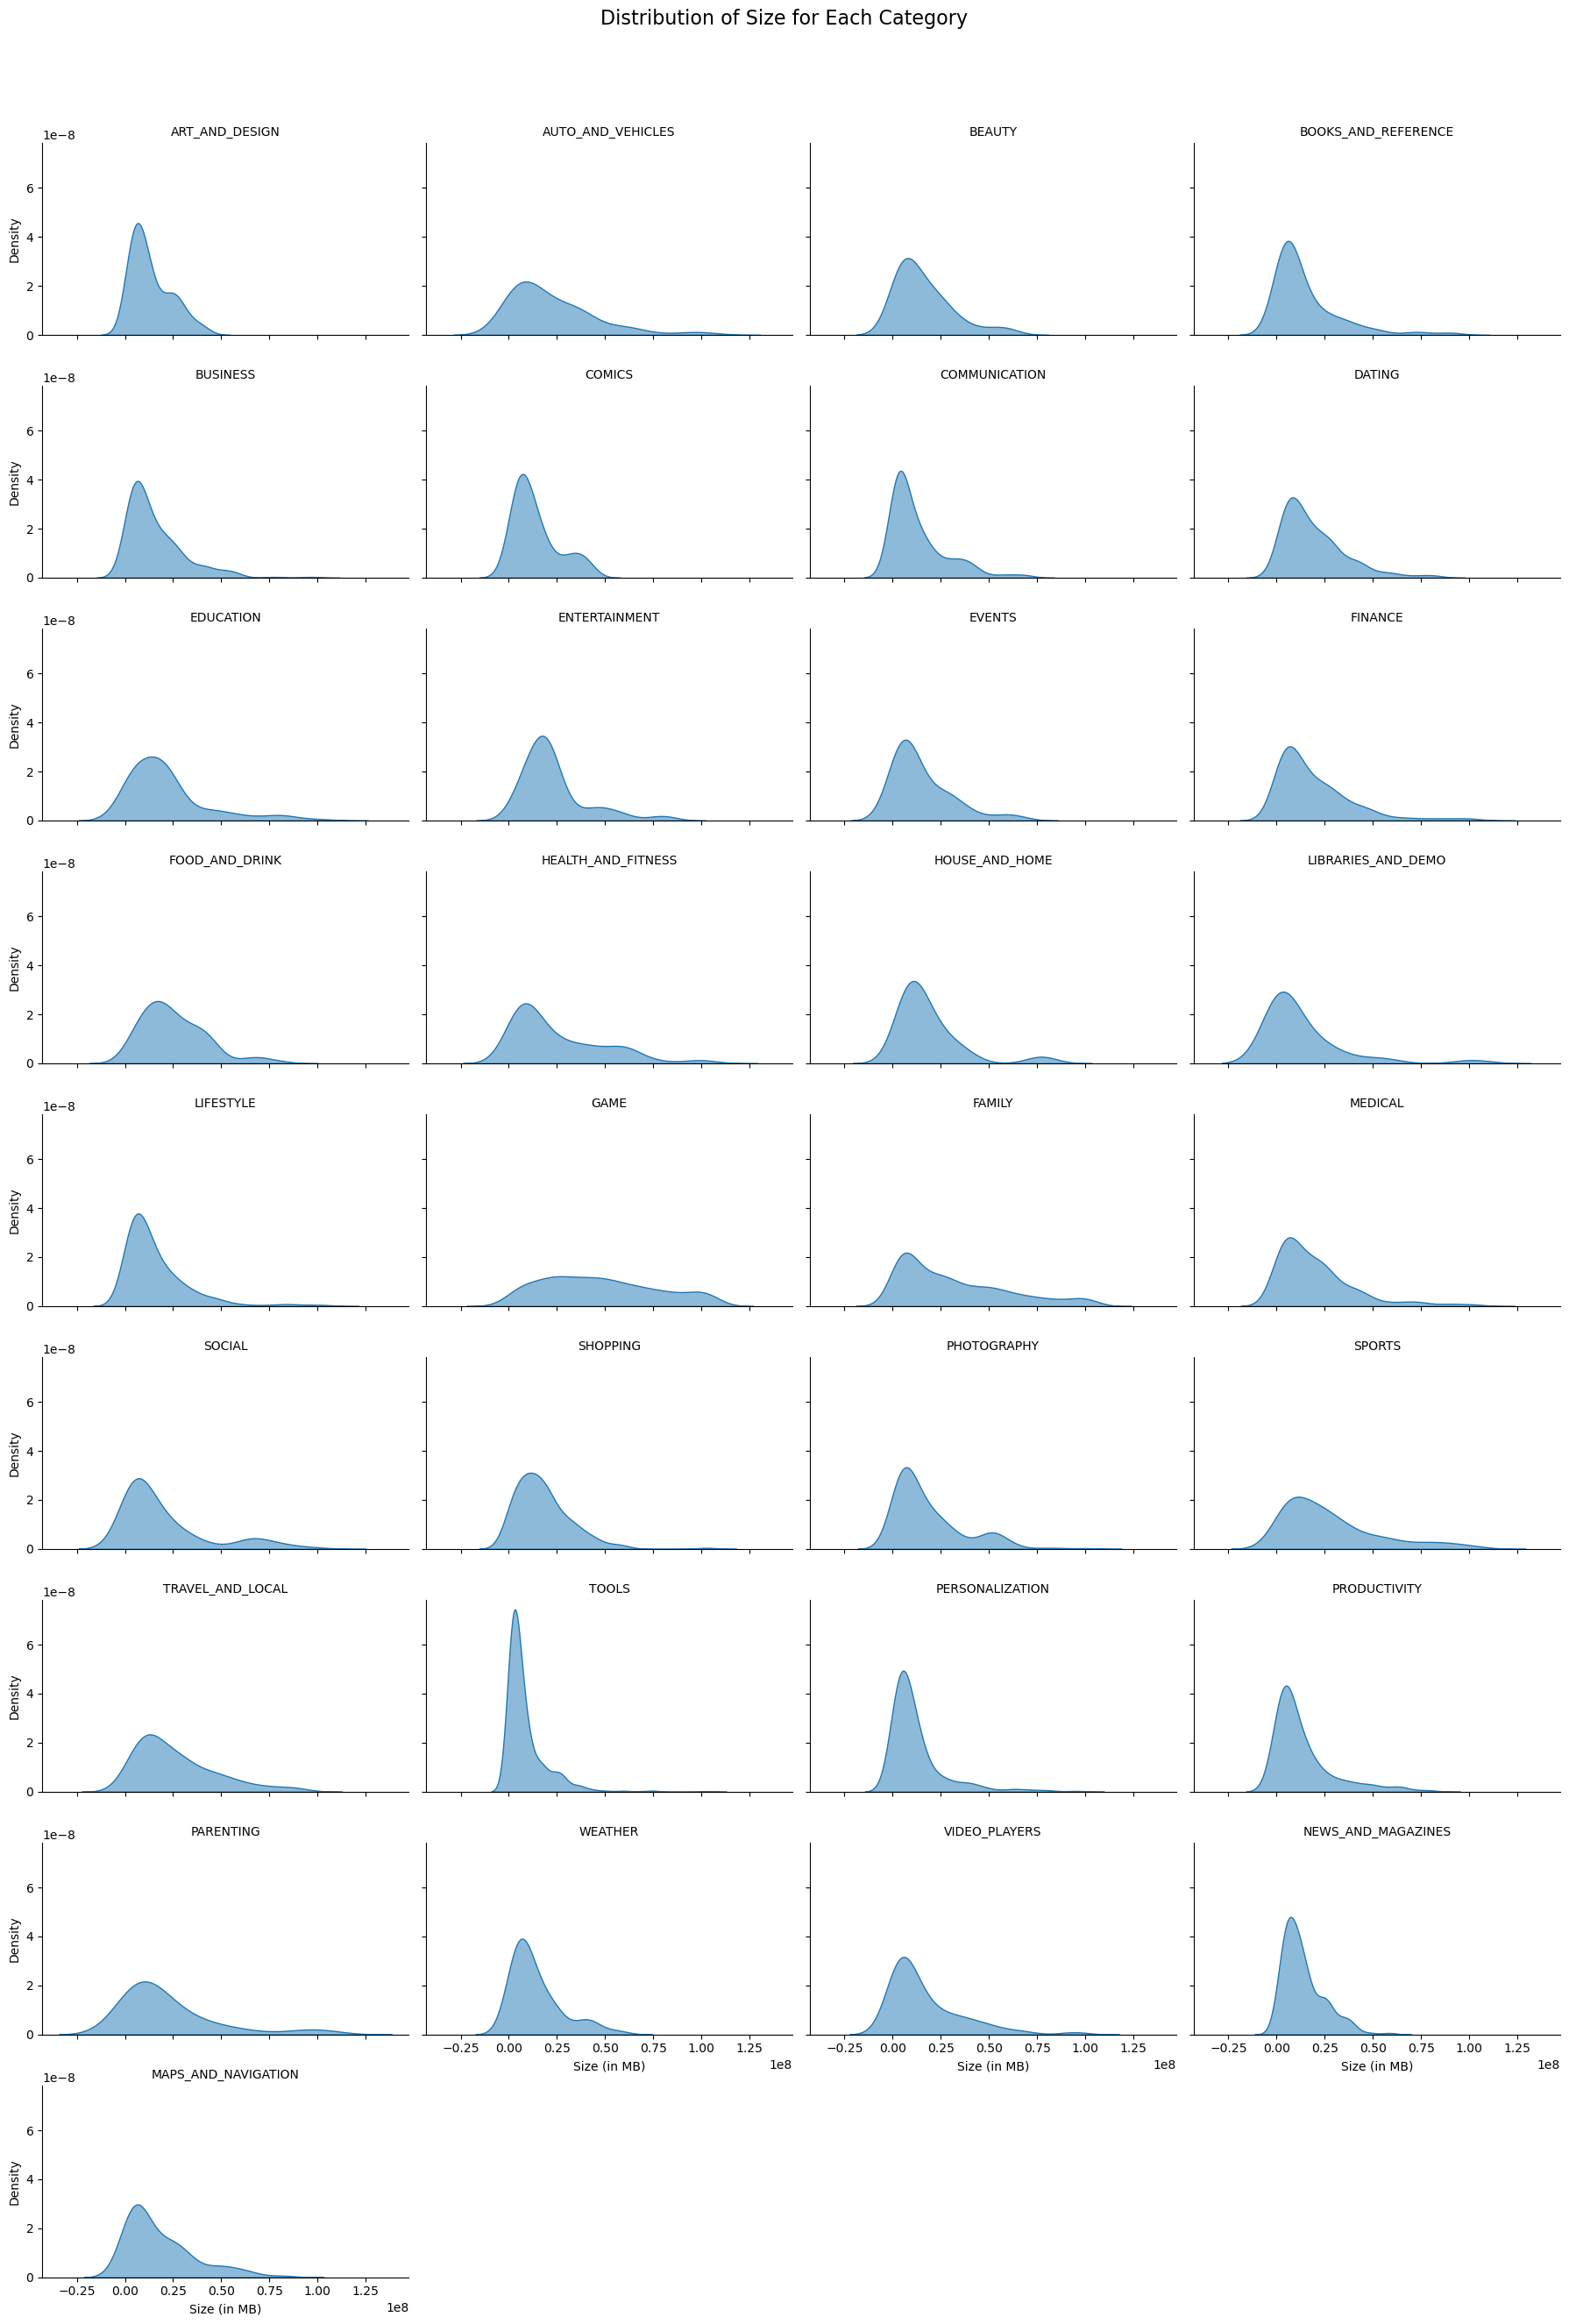

In [62]:
# What does the distribution of size look like for each category?

# Drop rows with NaN values in Size or Category
df_cleaned = df.dropna(subset=['Size_in_bytes'])

# Set up the FacetGrid
g = sns.FacetGrid(df_cleaned, col='Category', col_wrap=4, height=3, aspect=1.5)

# Map the kdeplot to each facet
g.map(sns.kdeplot, 'Size_in_bytes', fill=True, common_norm=False, alpha=0.5)

# Add titles and labels
g.set_titles(col_template="{col_name}")
g.set_axis_labels("Size (in MB)", "Density")
g.fig.suptitle('Distribution of Size for Each Category', fontsize=16)
g.fig.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust to make room for the title

# Show the plots
plt.show()

In [63]:
# Most are skewed, so mode would be a better choice than mean if we are going to impute values.

In [64]:
# Count missing Size values for each category
missing_size_counts = df.groupby('Category')['Size_in_bytes'].apply(lambda x: x.isnull().sum())

# Count total entries in each category
total_counts = df.groupby('Category')['Size_in_bytes'].count()

# Create a DataFrame for better visualization
missing_size_df = pd.DataFrame({
    'Missing Size Count': missing_size_counts,
    'Total Count': total_counts
})

# Calculate percentage of missing Size values
missing_size_df['Percentage Missing'] = (missing_size_df['Missing Size Count'] / (missing_size_df['Missing Size Count'] + missing_size_df['Total Count'])) * 100

# Reset index for better display
missing_size_df.reset_index(inplace=True)

# Display the results
print(missing_size_df)

               Category  Missing Size Count  Total Count  Percentage Missing
0        ART_AND_DESIGN                   3           59            4.838710
1     AUTO_AND_VEHICLES                  10           63           13.698630
2                BEAUTY                   5           37           11.904762
3   BOOKS_AND_REFERENCE                  34          144           19.101124
4              BUSINESS                  57          246           18.811881
5                COMICS                   9           49           15.517241
6         COMMUNICATION                 117          211           35.670732
7                DATING                  22          173           11.282051
8             EDUCATION                  45          110           29.032258
9         ENTERTAINMENT                  59           90           39.597315
10               EVENTS                   7           38           15.555556
11               FAMILY                 130         1617            7.441328

In [65]:
# Fairly even spread of % missing in each category. 
# Rather than have missing data, I will impute the mode of each category.

# Create a mask for missing values in Size
mask_missing_size = df['Size_in_bytes'].isnull()

# Calculate the mode of Size for each Category
mode_size_by_category = df.groupby('Category')['Size_in_bytes'].agg(lambda x: x.mode()[0] if not x.mode().empty else None)

# Impute the mode back into the original DataFrame
df.loc[mask_missing_size, 'Size_in_bytes'] = df.loc[mask_missing_size, 'Category'].map(mode_size_by_category)

# Check the result
print(df['Size_in_bytes'].isnull().sum())  # This should be 0 if all missing values were filled

0


In [66]:
# All missing values replaced with the mode of the Size_in_bytes per Category.

## Installs

In [68]:
df['Installs'].unique()


array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '100+', '500+', '10+',
       '5+', '50+', '1+'], dtype=object)

In [69]:
# Need to remove the '+' signs and the commas

# Remove commas and plus signs using str.replace
df['Installs'] = df['Installs'].str.replace(',', '', regex=False)  # Remove commas
df['Installs'] = df['Installs'].str.replace('+', '', regex=False)  # Remove plus signs

# Convert to integers
df['Installs'] = df['Installs'].astype('int')

In [70]:
df['Installs'].value_counts()

Installs
1000000       1577
10000000      1252
100000        1150
10000         1010
5000000        752
1000           713
500000         538
50000          467
5000           432
100000000      409
100            309
50000000       289
500            201
500000000       72
10              69
1000000000      58
50              56
5                9
1                3
Name: count, dtype: int64

In [71]:
# Installs column looks good

In [72]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rating,9366.0,4.191757e+00,5.152189e-01,1.0,4.00,4.3,4.50,5.000000e+00
Reviews,9366.0,5.140498e+05,3.144042e+06,1.0,186.25,5930.5,81532.75,7.815831e+07
Size_in_bytes,9366.0,2.402013e+07,2.486491e+07,8704.0,5976883.20,15728640.0,31457280.00,1.048576e+08
Installs,9366.0,1.789744e+07,9.123822e+07,1.0,10000.00,500000.0,5000000.00,1.000000e+09


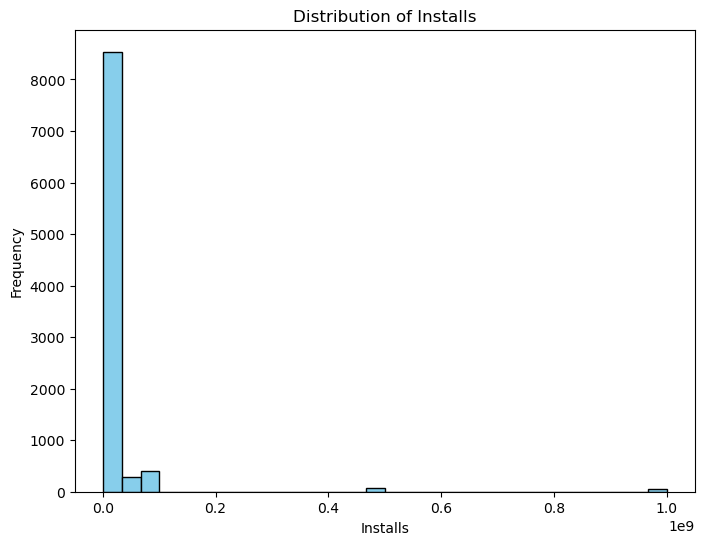

In [73]:
# Plotting histogram separately as data was concentrated in one small part of the chart and it was difficult to read

plt.figure(figsize=(8, 6))
plt.hist(df['Installs'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Installs')
plt.ylabel('Frequency')
plt.title('Distribution of Installs')
plt.show()

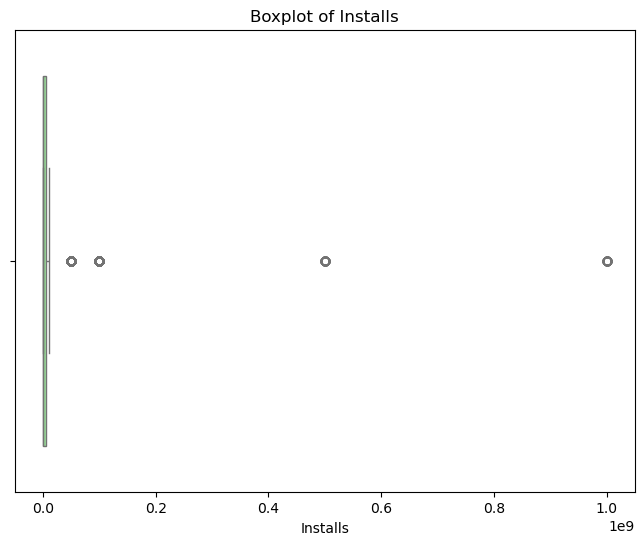

In [74]:
# Create a figure for the boxplot
plt.figure(figsize=(8, 6))

# Create the boxplot using Seaborn
sns.boxplot(data=df, x='Installs', color='lightgreen')
plt.title('Boxplot of Installs')
plt.xlabel('Installs')

# Display the plot
plt.show()

## Type

In [76]:

df['Type'].unique()

array(['Free', 'Paid'], dtype=object)

In [77]:
df['Type'].value_counts()

Type
Free    8719
Paid     647
Name: count, dtype: int64

In [78]:
# There is one Type value of NaN

# Find all rows where 'Type' is NaN
nan_rows_df = df[df['Type'].isna()]

# Display the rows with NaN in 'Type' as a DataFrame
print("\nRows where 'Type' is NaN:")
print(nan_rows_df)


Rows where 'Type' is NaN:
Empty DataFrame
Columns: [App, Category, Rating, Reviews, Size_in_bytes, Installs, Type, Price, Content Rating, Genres, Last Updated, Current Ver, Android Ver, cat_1.9, cat_ART_AND_DESIGN, cat_AUTO_AND_VEHICLES, cat_BEAUTY, cat_BOOKS_AND_REFERENCE, cat_BUSINESS, cat_COMICS, cat_COMMUNICATION, cat_DATING, cat_EDUCATION, cat_ENTERTAINMENT, cat_EVENTS, cat_FAMILY, cat_FINANCE, cat_FOOD_AND_DRINK, cat_GAME, cat_HEALTH_AND_FITNESS, cat_HOUSE_AND_HOME, cat_LIBRARIES_AND_DEMO, cat_LIFESTYLE, cat_MAPS_AND_NAVIGATION, cat_MEDICAL, cat_NEWS_AND_MAGAZINES, cat_PARENTING, cat_PERSONALIZATION, cat_PHOTOGRAPHY, cat_PRODUCTIVITY, cat_SHOPPING, cat_SOCIAL, cat_SPORTS, cat_TOOLS, cat_TRAVEL_AND_LOCAL, cat_VIDEO_PLAYERS, cat_WEATHER]
Index: []

[0 rows x 47 columns]


In [79]:
# Given there's just one row and the Price is 0.0, it is fair to replace the NaN with 'Free'
# Replace NaN in 'Type' column for the row with index 1
df.loc[9148, 'Type'] = 'Free'

In [80]:
# Type
df['Type'].unique()

array(['Free', 'Paid'], dtype=object)

In [81]:
# The NaN value has been successfully replaced.

In [82]:
# Convert Free and Paid to binary
# Create a mapping dictionary for 'Type'
type_mapping = {'Free': 0, 'Paid': 1}

In [83]:
# Encode the 'Type' column

df=pd.concat([df, pd.get_dummies(df['Type'])], axis=1)

In [84]:
df.head()

,App,Category,Rating,Reviews,Size_in_bytes,Installs,Type,Price,Content Rating,Genres,...,cat_PRODUCTIVITY,cat_SHOPPING,cat_SOCIAL,cat_SPORTS,cat_TOOLS,cat_TRAVEL_AND_LOCAL,cat_VIDEO_PLAYERS,cat_WEATHER,Free,Paid
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19922944.0,10000.0,Free,0,Everyone,Art & Design,...,False,False,False,False,False,False,False,False,True,False
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14680064.0,500000.0,Free,0,Everyone,Art & Design;Pretend Play,...,False,False,False,False,False,False,False,False,True,False
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,9122611.2,5000000.0,Free,0,Everyone,Art & Design,...,False,False,False,False,False,False,False,False,True,False
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,26214400.0,50000000.0,Free,0,Teen,Art & Design,...,False,False,False,False,False,False,False,False,True,False
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2936012.8,100000.0,Free,0,Everyone,Art & Design;Creativity,...,False,False,False,False,False,False,False,False,True,False


## Price

In [86]:
df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$7.99', '$5.99', '$2.99', '$3.49',
       '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49', '$10.00',
       '$24.99', '$11.99', '$79.99', '$16.99', '$14.99', '$29.99',
       '$12.99', '$2.49', '$10.99', '$1.50', '$19.99', '$15.99', '$33.99',
       '$39.99', '$3.95', '$4.49', '$1.70', '$8.99', '$1.49', '$3.88',
       '$399.99', '$17.99', '$400.00', '$3.02', '$1.76', '$4.84', '$4.77',
       '$1.61', '$2.50', '$1.59', '$6.49', '$1.29', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$8.49', '$1.75', '$14.00', '$2.00',
       '$3.08', '$2.59', '$19.40', '$3.90', '$4.59', '$15.46', '$3.04',
       '$13.99', '$4.29', '$3.28', '$4.60', '$1.00', '$2.95', '$2.90',
       '$1.97', '$2.56', '$1.20', nan], dtype=object)

In [87]:
# Will need to remove the $ signs
df['Price'] = df['Price'].str.replace('$', '', regex=False)

In [88]:
df['Price'].unique()

array(['0', '4.99', '3.99', '6.99', '7.99', '5.99', '2.99', '3.49',
       '1.99', '9.99', '7.49', '0.99', '9.00', '5.49', '10.00', '24.99',
       '11.99', '79.99', '16.99', '14.99', '29.99', '12.99', '2.49',
       '10.99', '1.50', '19.99', '15.99', '33.99', '39.99', '3.95',
       '4.49', '1.70', '8.99', '1.49', '3.88', '399.99', '17.99',
       '400.00', '3.02', '1.76', '4.84', '4.77', '1.61', '2.50', '1.59',
       '6.49', '1.29', '299.99', '379.99', '37.99', '18.99', '389.99',
       '8.49', '1.75', '14.00', '2.00', '3.08', '2.59', '19.40', '3.90',
       '4.59', '15.46', '3.04', '13.99', '4.29', '3.28', '4.60', '1.00',
       '2.95', '2.90', '1.97', '2.56', '1.20', nan], dtype=object)

In [89]:
# Convert Price to numeric
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

In [90]:
df['Price'].dtype

dtype('float64')

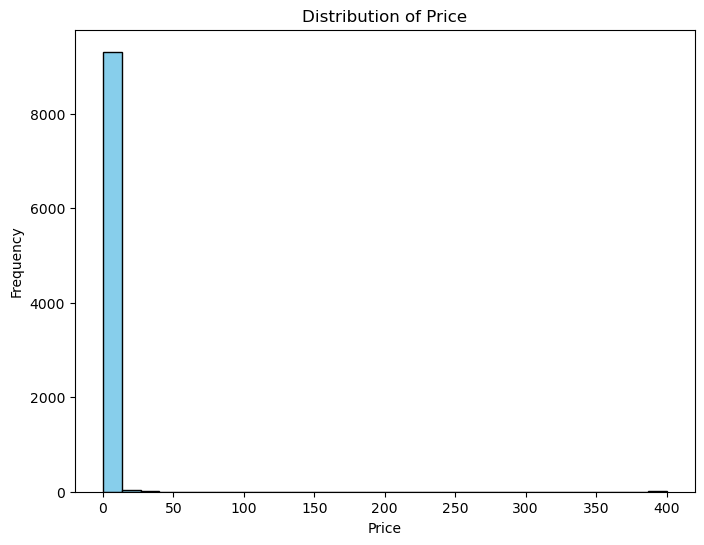

In [91]:
# Plotting histogram separately as data was concentrated in one small part of the chart and it was difficult to read

plt.figure(figsize=(8, 6))
plt.hist(df['Price'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Price')
plt.show()

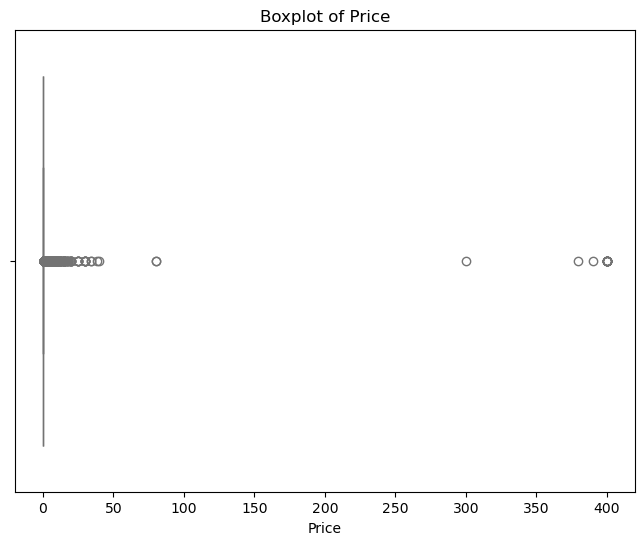

In [92]:
# Create a figure for the boxplot
plt.figure(figsize=(8, 6))

# Create the boxplot using Seaborn
sns.boxplot(data=df, x='Price', color='lightgreen')
plt.title('Boxplot of Price')
plt.xlabel('Price')

# Display the plot
plt.show()

In [93]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rating,9366.0,4.191757e+00,5.152189e-01,1.0,4.00,4.3,4.50,5.000000e+00
Reviews,9366.0,5.140498e+05,3.144042e+06,1.0,186.25,5930.5,81532.75,7.815831e+07
Size_in_bytes,9366.0,2.402013e+07,2.486491e+07,8704.0,5976883.20,15728640.0,31457280.00,1.048576e+08
Installs,9366.0,1.789744e+07,9.123822e+07,1.0,10000.00,500000.0,5000000.00,1.000000e+09
Price,9366.0,9.609278e-01,1.581658e+01,0.0,0.00,0.0,0.00,4.000000e+02


In [94]:
# Let's make that easier to read by changing the format of scientific notation.
# Generate the description
desc = df.describe()

# Apply formatting to the description
desc_formatted = desc.map(lambda x: f'{x:.2f}')

# Display the formatted description
print(desc_formatted)

        Rating      Reviews Size_in_bytes       Installs    Price
count  9366.00      9366.00       9366.00        9366.00  9366.00
mean      4.19    514049.84   24020134.06    17897443.73     0.96
std       0.52   3144042.13   24864909.61    91238217.38    15.82
min       1.00         1.00       8704.00           1.00     0.00
25%       4.00       186.25    5976883.20       10000.00     0.00
50%       4.30      5930.50   15728640.00      500000.00     0.00
75%       4.50     81532.75   31457280.00     5000000.00     0.00
max       5.00  78158306.00  104857600.00  1000000000.00   400.00


In [95]:
# Everything looking good, although I can't believe an app can cost USD400!!!

## Content Rating

In [97]:
df['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated', nan], dtype=object)

In [98]:
df['Content Rating'].value_counts()

Content Rating
Everyone           7420
Teen               1084
Mature 17+          461
Everyone 10+        397
Adults only 18+       3
Unrated               1
Name: count, dtype: int64

In [99]:
# Count NaN values in 'Content Rating' column
nan_count = df['Content Rating'].isna().sum()

print(f"Number of NaN values in 'Content Rating': {nan_count}")

Number of NaN values in 'Content Rating': 1


In [100]:
df['Content Rating'] = df['Content Rating'].replace(0, 'Everyone')

In [101]:
df['Content Rating'] = df['Content Rating'].replace(np.nan, 'Unrated')

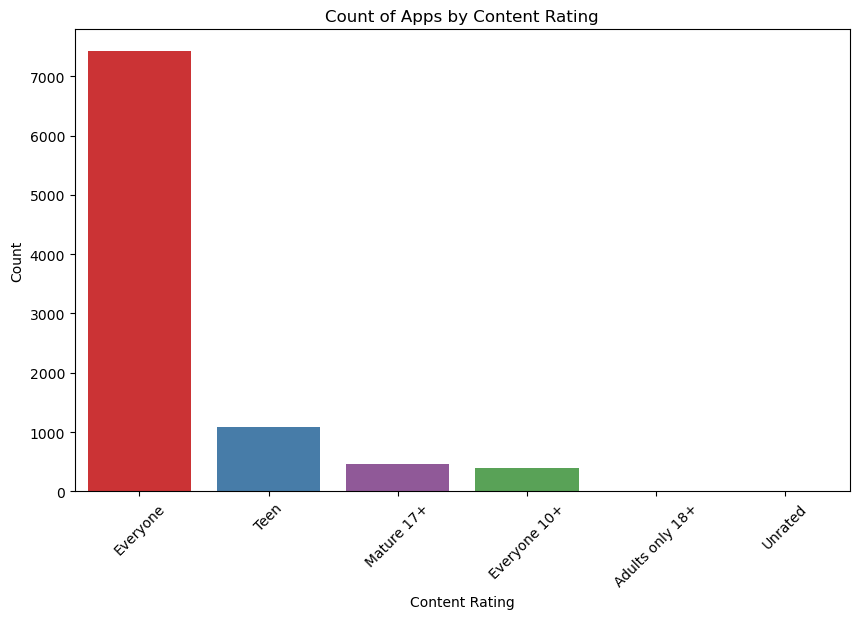

In [102]:
# Create a figure for the bar plot
plt.figure(figsize=(10, 6))

# Plotting the bar plot using Seaborn
sns.countplot(data=df, x='Content Rating', palette='Set1', hue='Content Rating', order=df['Content Rating'].value_counts().index)

# Set the labels and title
plt.xlabel('Content Rating')
plt.ylabel('Count')
plt.title('Count of Apps by Content Rating')

# Display the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show() 

In [103]:
# Looks ok

In [104]:
# Encode the data
# Create a mapping dictionary
content_rating_mapping = {content_rating: idx for idx, content_rating in enumerate(df['Content Rating'].unique())}

In [105]:
# Encode the 'Category' column
df['Content_Rating_Encoded'] = df['Content Rating'].map(content_rating_mapping)

In [106]:
print(df[['Content Rating', 'Content_Rating_Encoded']].head())

  Content Rating  Content_Rating_Encoded
0       Everyone                       0
1       Everyone                       0
2       Everyone                       0
3           Teen                       1
4       Everyone                       0


## Genres

In [108]:
df['Genres'].unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Auto & Vehicles', 'Beauty',
       'Books & Reference', 'Business', 'Comics', 'Comics;Creativity',
       'Communication', 'Dating', 'Education;Education', 'Education',
       'Education;Creativity', 'Education;Music & Video',
       'Education;Action & Adventure', 'Education;Pretend Play',
       'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play',
       'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity',
       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
       'Trivia', 'Role Playing', 'Simulation;Education',
 

In [109]:
df['Genres'].value_counts()

Genres
Tools                      733
Entertainment              533
Education                  468
Action                     358
Productivity               351
                          ... 
Parenting;Brain Games        1
Card;Brain Games             1
Tools;Education              1
Entertainment;Education      1
Strategy;Creativity          1
Name: count, Length: 115, dtype: int64

In [110]:
# I will encode for now and decide what to do later,
# Encoding Genres
le = LabelEncoder()
df['Genres'] = le.fit_transform(df['Genres'])
df.head()

,App,Category,Rating,Reviews,Size_in_bytes,Installs,Type,Price,Content Rating,Genres,...,cat_SHOPPING,cat_SOCIAL,cat_SPORTS,cat_TOOLS,cat_TRAVEL_AND_LOCAL,cat_VIDEO_PLAYERS,cat_WEATHER,Free,Paid,Content_Rating_Encoded
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19922944.0,10000.0,Free,0.0,Everyone,9,...,False,False,False,False,False,False,False,True,False,0
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14680064.0,500000.0,Free,0.0,Everyone,11,...,False,False,False,False,False,False,False,True,False,0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,9122611.2,5000000.0,Free,0.0,Everyone,9,...,False,False,False,False,False,False,False,True,False,0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,26214400.0,50000000.0,Free,0.0,Teen,9,...,False,False,False,False,False,False,False,True,False,1
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2936012.8,100000.0,Free,0.0,Everyone,10,...,False,False,False,False,False,False,False,True,False,0


## Last Updated

In [112]:
df['Last Updated'].unique()


array(['January 7, 2018', 'January 15, 2018', 'August 1, 2018', ...,
       'February 16, 2014', 'March 23, 2014', nan], dtype=object)

In [113]:
df['Last Updated'].value_counts()

Last Updated
August 3, 2018       319
August 2, 2018       284
July 31, 2018        279
August 1, 2018       275
July 30, 2018        199
                    ... 
November 1, 2013       1
March 16, 2015         1
December 17, 2015      1
June 15, 2013          1
March 23, 2014         1
Name: count, Length: 1300, dtype: int64

In [114]:
#### Change Last update into a datetime column
df['Last Updated'] = pd.to_datetime(df['Last Updated'])
df['Last Updated']

0       2018-01-07
1       2018-01-15
2       2018-08-01
3       2018-06-08
4       2018-06-20
           ...    
10836   2017-07-25
10837   2018-07-06
10839   2015-01-19
10840   2018-07-25
9148           NaT
Name: Last Updated, Length: 9367, dtype: datetime64[ns]

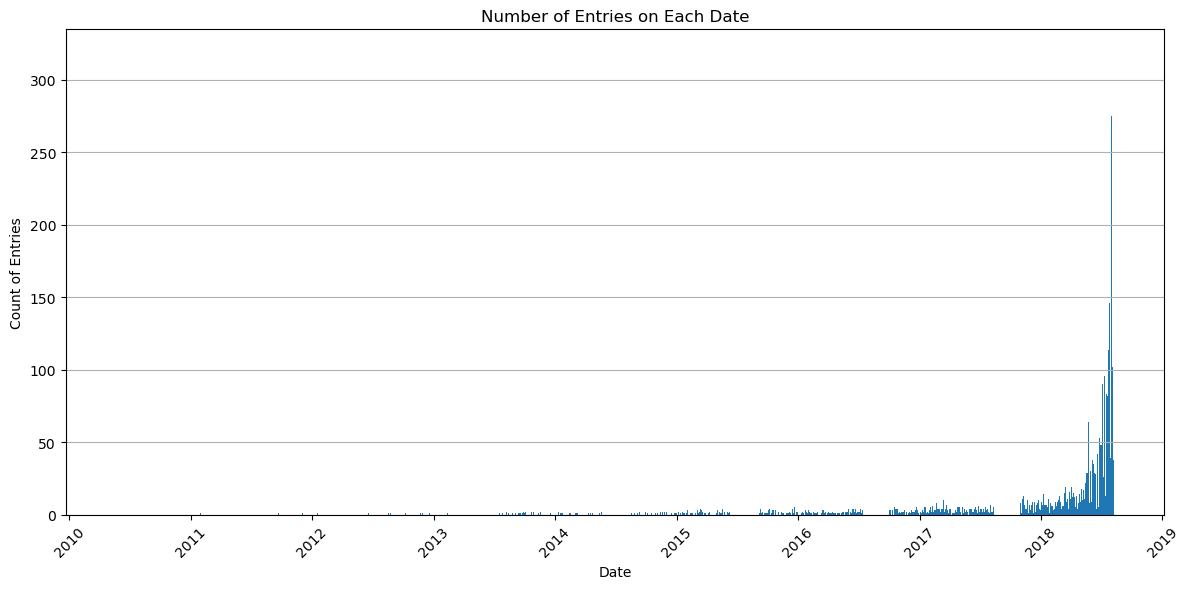

In [115]:
# Group by 'Last Updated' and count occurrences
date_counts = df['Last Updated'].value_counts().sort_index()

# Plotting
plt.figure(figsize=(12, 6))
plt.bar(date_counts.index, date_counts.values)
plt.title('Number of Entries on Each Date')
plt.xlabel('Date')
plt.ylabel('Count of Entries')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y')  # Add grid lines for y-axis
plt.tight_layout()  # Adjust layout
plt.show()

In [116]:
# I very much doubt that 'day' is going to make much of a difference to rating, and 'month' probably has the same low weighting on rating.
# I could split them out into new features?

## Current Ver

In [118]:
df['Current Ver'].unique()

array(['1.0.0', '2.0.0', '1.2.4', ..., '1.5.447', '1.0.612928', '0.3.4'],
      dtype=object)

In [119]:
df['Current Ver'].value_counts()

Current Ver
Varies with device    1415
1.0                    458
1.1                    195
1.2                    126
1.3                    120
                      ... 
2.9.10                   1
3.18.5                   1
1.3.A.2.9                1
9.9.1.1910               1
0.3.4                    1
Name: count, Length: 2638, dtype: int64

In [120]:
# Current Ver column missing values check
df[df['Current Ver'].isnull()]

,App,Category,Rating,Reviews,Size_in_bytes,Installs,Type,Price,Content Rating,Genres,...,cat_SHOPPING,cat_SOCIAL,cat_SPORTS,cat_TOOLS,cat_TRAVEL_AND_LOCAL,cat_VIDEO_PLAYERS,cat_WEATHER,Free,Paid,Content_Rating_Encoded
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55.0,2831155.2,5000.0,Free,0.00,Everyone,9,...,False,False,False,False,False,False,False,True,False,0
1553,Market Update Helper,LIBRARIES_AND_DEMO,4.1,20145.0,11264.0,1000000.0,Free,0.00,Everyone,64,...,False,False,False,False,False,False,False,True,False,0
6322,Virtual DJ Sound Mixer,TOOLS,4.2,4010.0,9122611.2,500000.0,Free,0.00,Everyone,105,...,False,False,False,True,False,False,False,True,False,0
7333,Dots puzzle,FAMILY,4.0,179.0,14680064.0,50000.0,Paid,0.99,Everyone,81,...,False,False,False,False,False,False,False,False,True,0
9148,NaN,NaN,NaN,NaN,NaN,NaN,Free,NaN,Unrated,115,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,False,5


In [121]:
# There are only 8 with Current Ver missing, rather than deleting the data, I will replace these with ver '1.0.0'

df['Current Ver'] = df['Current Ver'].fillna('1.0.0')

In [122]:
# Check this has worked
df[df['Current Ver'].isnull()]

,App,Category,Rating,Reviews,Size_in_bytes,Installs,Type,Price,Content Rating,Genres,...,cat_SHOPPING,cat_SOCIAL,cat_SPORTS,cat_TOOLS,cat_TRAVEL_AND_LOCAL,cat_VIDEO_PLAYERS,cat_WEATHER,Free,Paid,Content_Rating_Encoded


In [123]:
# Find all rows where 'Current Ver' is NaN
nan_rows_df = df[df['Current Ver'].isna()]

# Display the rows with NaN in 'Current Ver' as a DataFrame
print("\nRows where 'Current Ver' is NaN:")
print(nan_rows_df)


Rows where 'Current Ver' is NaN:
Empty DataFrame
Columns: [App, Category, Rating, Reviews, Size_in_bytes, Installs, Type, Price, Content Rating, Genres, Last Updated, Current Ver, Android Ver, cat_1.9, cat_ART_AND_DESIGN, cat_AUTO_AND_VEHICLES, cat_BEAUTY, cat_BOOKS_AND_REFERENCE, cat_BUSINESS, cat_COMICS, cat_COMMUNICATION, cat_DATING, cat_EDUCATION, cat_ENTERTAINMENT, cat_EVENTS, cat_FAMILY, cat_FINANCE, cat_FOOD_AND_DRINK, cat_GAME, cat_HEALTH_AND_FITNESS, cat_HOUSE_AND_HOME, cat_LIBRARIES_AND_DEMO, cat_LIFESTYLE, cat_MAPS_AND_NAVIGATION, cat_MEDICAL, cat_NEWS_AND_MAGAZINES, cat_PARENTING, cat_PERSONALIZATION, cat_PHOTOGRAPHY, cat_PRODUCTIVITY, cat_SHOPPING, cat_SOCIAL, cat_SPORTS, cat_TOOLS, cat_TRAVEL_AND_LOCAL, cat_VIDEO_PLAYERS, cat_WEATHER, Free, Paid, Content_Rating_Encoded]
Index: []

[0 rows x 50 columns]


In [124]:
# Worked - no null values and no NaN value

## Android Ver

In [126]:
df['Android Ver'].unique()

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up',
       'Varies with device', '2.2 and up', '5.0 and up', '6.0 and up',
       '1.6 and up', '1.5 and up', '2.1 and up', '7.0 and up',
       '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up', '3.2 and up',
       '4.4W and up', '5.1 and up', '7.1 and up', '7.0 - 7.1.1',
       '8.0 and up', '5.0 - 8.0', '3.1 and up', '2.0.1 and up',
       '4.1 - 7.1.1', nan, '5.0 - 6.0', '1.0 and up'], dtype=object)

In [127]:
df['Android Ver'].value_counts()

Android Ver
4.1 and up            2059
Varies with device    1319
4.0.3 and up          1240
4.0 and up            1131
4.4 and up             875
2.3 and up             582
5.0 and up             535
4.2 and up             338
2.3.3 and up           240
3.0 and up             211
2.2 and up             208
4.3 and up             207
2.1 and up             113
1.6 and up              87
6.0 and up              48
7.0 and up              41
3.2 and up              31
2.0 and up              27
5.1 and up              18
1.5 and up              16
3.1 and up               8
2.0.1 and up             7
4.4W and up              6
8.0 and up               5
7.1 and up               3
4.0.3 - 7.1.1            2
5.0 - 8.0                2
1.0 and up               2
7.0 - 7.1.1              1
4.1 - 7.1.1              1
5.0 - 6.0                1
Name: count, dtype: int64

In [128]:
# Android Ver column missing values check
df[df['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size_in_bytes,Installs,Type,Price,Content Rating,Genres,...,cat_SHOPPING,cat_SOCIAL,cat_SPORTS,cat_TOOLS,cat_TRAVEL_AND_LOCAL,cat_VIDEO_PLAYERS,cat_WEATHER,Free,Paid,Content_Rating_Encoded
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230.0,11534336.0,1000.0,Paid,1.49,Everyone,78,...,False,False,False,False,False,False,False,False,True,0
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189.0,2202009.6,10000.0,Free,0.00,Everyone,78,...,False,False,False,False,False,False,False,True,False,0
9148,NaN,NaN,NaN,NaN,NaN,NaN,Free,NaN,Unrated,115,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,False,5


In [129]:
# There are only 2 missing values, so rather than remove 2 rows of data that have valid Ratings, I will replace the missing Android Ver with the mode.
# imputing with mode and also fixing varies with device value issue

# Calculate the mode
mode_value = df['Android Ver'].mode()[0]

# Impute missing values with the mode
df['Android Ver'].fillna(mode_value)

# Count and print the number of missing values in the 'Android Ver' column
missing_count = df['Android Ver'].isna().sum()
print(f'Number of missing values in Android Ver column: {missing_count}')



Number of missing values in Android Ver column: 3


In [130]:
# All good

In [131]:
# Check for duplicate entries
df.duplicated().sum()

474

In [133]:
duplicate_rows = df[df.duplicated()]
duplicate_rows.head()

,App,Category,Rating,Reviews,Size_in_bytes,Installs,Type,Price,Content Rating,Genres,...,cat_SHOPPING,cat_SOCIAL,cat_SPORTS,cat_TOOLS,cat_TRAVEL_AND_LOCAL,cat_VIDEO_PLAYERS,cat_WEATHER,Free,Paid,Content_Rating_Encoded
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805.0,20971520.0,5000000.0,Free,0.0,Everyone,20,...,False,False,False,False,False,False,False,True,False,0
236,Box,BUSINESS,4.2,159872.0,20971520.0,10000000.0,Free,0.0,Everyone,20,...,False,False,False,False,False,False,False,True,False,0
239,Google My Business,BUSINESS,4.4,70991.0,20971520.0,5000000.0,Free,0.0,Everyone,20,...,False,False,False,False,False,False,False,True,False,0
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614.0,38797312.0,10000000.0,Free,0.0,Everyone,20,...,False,False,False,False,False,False,False,True,False,0
261,join.me - Simple Meetings,BUSINESS,4.0,6989.0,20971520.0,1000000.0,Free,0.0,Everyone,20,...,False,False,False,False,False,False,False,True,False,0


In [134]:
# Keep first occurrence
duplicate_rows_first = df[df.duplicated(keep='first')]

In [135]:
sns.pairplot(df)

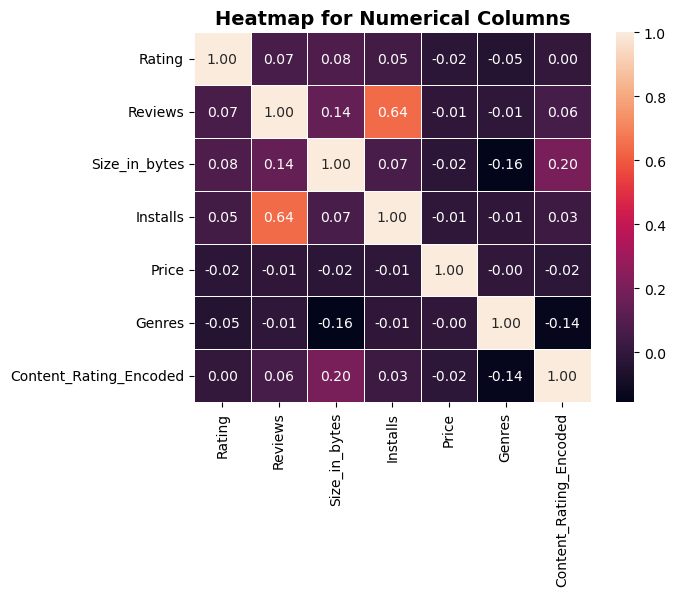

In [136]:
#Heatmap for numerical columns
# Calculate the correlation matrix, only for numeric columns
corr_matrix = df.select_dtypes(include=['number']).corr()

# Heatmap for numerical columns
sns.heatmap(corr_matrix, annot=True, linewidths=.5, fmt=".2f")
plt.title("Heatmap for Numerical Columns", fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.show()

In [137]:
# Fairly strong correlation between Installs and Review, but Rating is not really correlated with anything.

In [138]:
df.isnull().sum()

App                        1
Category                   1
Rating                     1
Reviews                    1
Size_in_bytes              1
Installs                   1
Type                       0
Price                      1
Content Rating             0
Genres                     0
Last Updated               1
Current Ver                0
Android Ver                3
cat_1.9                    1
cat_ART_AND_DESIGN         1
cat_AUTO_AND_VEHICLES      1
cat_BEAUTY                 1
cat_BOOKS_AND_REFERENCE    1
cat_BUSINESS               1
cat_COMICS                 1
cat_COMMUNICATION          1
cat_DATING                 1
cat_EDUCATION              1
cat_ENTERTAINMENT          1
cat_EVENTS                 1
cat_FAMILY                 1
cat_FINANCE                1
cat_FOOD_AND_DRINK         1
cat_GAME                   1
cat_HEALTH_AND_FITNESS     1
cat_HOUSE_AND_HOME         1
cat_LIBRARIES_AND_DEMO     1
cat_LIFESTYLE              1
cat_MAPS_AND_NAVIGATION    1
cat_MEDICAL   

# Unsupervised Learning

##### I will use K-Means to cluster the data, but will not be passing the 'Rating' data as this is what I want to predict during the supervised learning part.

In [141]:
# First check if I have any non-numerical data i.e. NaNs
nan_rows = df[df.isna().any(axis=1)]
print(nan_rows)

                         App         Category  Rating  Reviews  Size_in_bytes  \
4453  [substratum] Vacuum: P  PERSONALIZATION     4.4    230.0     11534336.0   
4490    Pi Dark [substratum]  PERSONALIZATION     4.5    189.0      2202009.6   
9148                     NaN              NaN     NaN      NaN            NaN   

      Installs  Type  Price Content Rating  Genres  ... cat_SHOPPING  \
4453    1000.0  Paid   1.49       Everyone      78  ...        False   
4490   10000.0  Free   0.00       Everyone      78  ...        False   
9148       NaN  Free    NaN        Unrated     115  ...          NaN   

     cat_SOCIAL cat_SPORTS cat_TOOLS cat_TRAVEL_AND_LOCAL cat_VIDEO_PLAYERS  \
4453      False      False     False                False             False   
4490      False      False     False                False             False   
9148        NaN        NaN       NaN                  NaN               NaN   

     cat_WEATHER   Free   Paid Content_Rating_Encoded  
4453       Fa

In [142]:
# Seems there is a 'rogue' row, which I will delete
df = df.drop(9148)

In [143]:
# Check it's gone
nan_rows = df[df.isna().any(axis=1)]
print(nan_rows)

                         App         Category  Rating  Reviews  Size_in_bytes  \
4453  [substratum] Vacuum: P  PERSONALIZATION     4.4    230.0     11534336.0   
4490    Pi Dark [substratum]  PERSONALIZATION     4.5    189.0      2202009.6   

      Installs  Type  Price Content Rating  Genres  ... cat_SHOPPING  \
4453    1000.0  Paid   1.49       Everyone      78  ...        False   
4490   10000.0  Free   0.00       Everyone      78  ...        False   

     cat_SOCIAL cat_SPORTS cat_TOOLS cat_TRAVEL_AND_LOCAL cat_VIDEO_PLAYERS  \
4453      False      False     False                False             False   
4490      False      False     False                False             False   

     cat_WEATHER   Free   Paid Content_Rating_Encoded  
4453       False  False   True                      0  
4490       False   True  False                      0  

[2 rows x 50 columns]


In [144]:
# KMeans does not handle categorical data very well. 
# Rather than encode it, I will not use those columns as I don't think they will add anything to the model

# Specify the columns to drop
columns_to_drop = ['App', 'Category', 'Type','Content Rating', 'Last Updated', 'Current Ver', 'Android Ver']

# Create a new DataFrame without the specified columns
df = df.drop(columns=columns_to_drop)
df.head().T

,0,1,2,3,4
Rating,4.1,3.9,4.7,4.5,4.3
Reviews,159.0,967.0,87510.0,215644.0,967.0
Size_in_bytes,19922944.0,14680064.0,9122611.2,26214400.0,2936012.8
Installs,10000.0,500000.0,5000000.0,50000000.0,100000.0
Price,0.0,0.0,0.0,0.0,0.0
Genres,9,11,9,9,10
cat_1.9,False,False,False,False,False
cat_ART_AND_DESIGN,True,True,True,True,True
cat_AUTO_AND_VEHICLES,False,False,False,False,False
cat_BEAUTY,False,False,False,False,False


In [145]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [146]:
# Select target variable from the features
X = df.drop(columns=['Rating'])  # Rating omitted
y=df['Rating']
X.head()

,Reviews,Size_in_bytes,Installs,Price,Genres,cat_1.9,cat_ART_AND_DESIGN,cat_AUTO_AND_VEHICLES,cat_BEAUTY,cat_BOOKS_AND_REFERENCE,...,cat_SHOPPING,cat_SOCIAL,cat_SPORTS,cat_TOOLS,cat_TRAVEL_AND_LOCAL,cat_VIDEO_PLAYERS,cat_WEATHER,Free,Paid,Content_Rating_Encoded
0,159.0,19922944.0,10000.0,0.0,9,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,0
1,967.0,14680064.0,500000.0,0.0,11,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,0
2,87510.0,9122611.2,5000000.0,0.0,9,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,0
3,215644.0,26214400.0,50000000.0,0.0,9,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,1
4,967.0,2936012.8,100000.0,0.0,10,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,0


In [147]:
# Split the data into training and testing.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [148]:
# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
df_scale = pd.DataFrame(X_scaled, columns=X.columns)
df_scale.sample(5)


,Reviews,Size_in_bytes,Installs,Price,Genres,cat_1.9,cat_ART_AND_DESIGN,cat_AUTO_AND_VEHICLES,cat_BEAUTY,cat_BOOKS_AND_REFERENCE,...,cat_SHOPPING,cat_SOCIAL,cat_SPORTS,cat_TOOLS,cat_TRAVEL_AND_LOCAL,cat_VIDEO_PLAYERS,cat_WEATHER,Free,Paid,Content_Rating_Encoded
4876,-0.163310,1.016062,-0.196117,0.001838,0.980691,0.0,-0.081632,-0.088631,-0.067116,-0.139187,...,-0.161473,-0.168641,-0.187777,-0.291603,-0.157247,-0.131833,-0.089846,-3.670973,3.670973,-0.446808
3345,0.033318,-0.333479,0.899918,-0.060758,0.547648,0.0,-0.081632,-0.088631,-0.067116,-0.139187,...,-0.161473,-0.168641,-0.187777,-0.291603,-0.157247,-0.131833,-0.089846,0.272407,-0.272407,-0.446808
2492,0.107640,1.901698,-0.086563,-0.060758,1.104418,0.0,-0.081632,-0.088631,-0.067116,-0.139187,...,-0.161473,5.929769,-0.187777,-0.291603,-0.157247,-0.131833,-0.089846,0.272407,-0.272407,3.383094
5562,-0.163234,0.299118,-0.195076,-0.060758,1.382802,0.0,-0.081632,-0.088631,-0.067116,-0.139187,...,-0.161473,-0.168641,-0.187777,-0.291603,6.359440,-0.131833,-0.089846,0.272407,-0.272407,-0.446808
1457,-0.163378,3.040374,-0.195624,-0.060758,0.052742,0.0,-0.081632,-0.088631,-0.067116,-0.139187,...,-0.161473,-0.168641,-0.187777,-0.291603,-0.157247,-0.131833,-0.089846,0.272407,-0.272407,-0.446808


In [149]:
# Dimensionality reduction with PCA

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scale)

# Create a new DataFrame with PCA results and cluster labels
df_pca = pd.DataFrame(data = df_pca, columns=['Principal Component 1', 'Principal Component 2'])
df_pca.head()


,Principal Component 1,Principal Component 2
0,0.747152,-0.642189
1,0.672039,-0.557530
2,0.644993,-0.524259
3,1.268994,-0.999834
4,0.550653,-0.439639


C:\Users\mdjro\anaconda3\envs\IOD\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\mdjro\anaconda3\envs\IOD\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


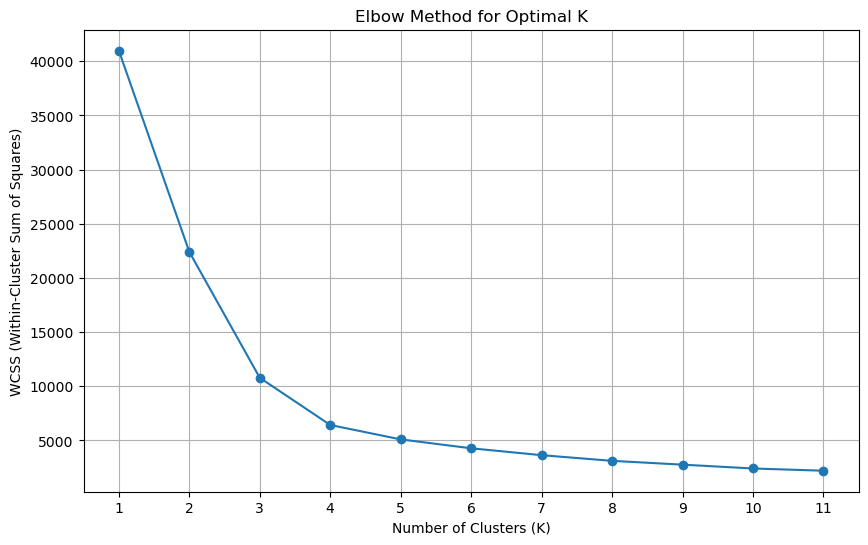

In [150]:
# Run K-means for different values of K and calculate WCSS
wcss = []
K_range = range(1, 12)  

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_pca)
    wcss.append(kmeans.inertia_)  # Within-cluster sum of squares

# Step 4: Plot the Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(K_range, wcss, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.xticks(K_range)
plt.grid()
plt.show()

In [151]:
# Optimal K = 3, so we should be able to segment the dataset into 3 clusters

from sklearn import cluster

# Initialize KMeans with the desired number of clusters
kmeans = cluster.KMeans(n_clusters=3)

# Fit the model and predict the cluster labels
y_predicted = kmeans.fit_predict(df_pca)

# Add the predicted labels to the two dataframes
df_pca['Cluster'] = y_predicted
df['Cluster'] = y_predicted

df_pca.head()


,Principal Component 1,Principal Component 2,Cluster
0,0.747152,-0.642189,1
1,0.672039,-0.557530,1
2,0.644993,-0.524259,1
3,1.268994,-0.999834,1
4,0.550653,-0.439639,1


In [152]:
df.head()

,Rating,Reviews,Size_in_bytes,Installs,Price,Genres,cat_1.9,cat_ART_AND_DESIGN,cat_AUTO_AND_VEHICLES,cat_BEAUTY,...,cat_SOCIAL,cat_SPORTS,cat_TOOLS,cat_TRAVEL_AND_LOCAL,cat_VIDEO_PLAYERS,cat_WEATHER,Free,Paid,Content_Rating_Encoded,Cluster
0,4.1,159.0,19922944.0,10000.0,0.0,9,False,True,False,False,...,False,False,False,False,False,False,True,False,0,1
1,3.9,967.0,14680064.0,500000.0,0.0,11,False,True,False,False,...,False,False,False,False,False,False,True,False,0,1
2,4.7,87510.0,9122611.2,5000000.0,0.0,9,False,True,False,False,...,False,False,False,False,False,False,True,False,0,1
3,4.5,215644.0,26214400.0,50000000.0,0.0,9,False,True,False,False,...,False,False,False,False,False,False,True,False,1,1
4,4.3,967.0,2936012.8,100000.0,0.0,10,False,True,False,False,...,False,False,False,False,False,False,True,False,0,1


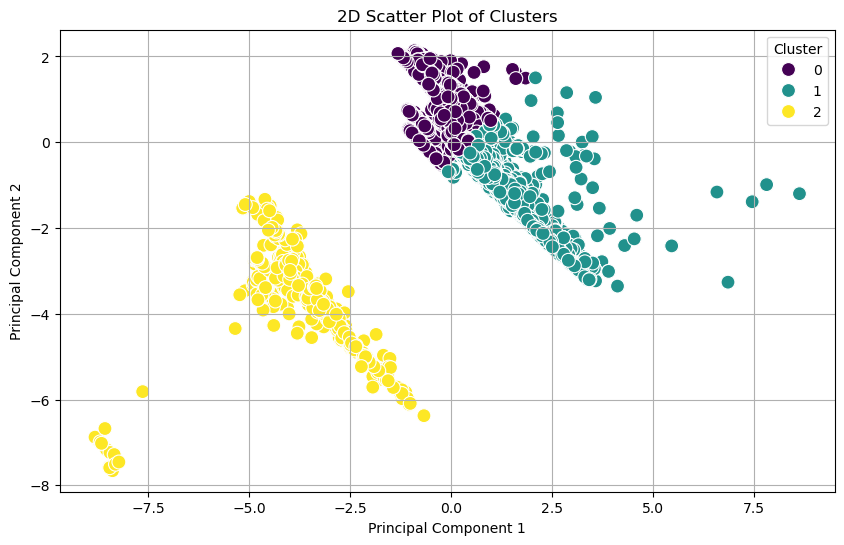

In [153]:
# Visualise the clusters

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_pca, x='Principal Component 1', y='Principal Component 2', hue='Cluster', palette='viridis', s=100)
plt.title('2D Scatter Plot of Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid()
plt.show()

In [154]:
# I have fairly separated clusters which could indicate some distinct groups in the data.

In [155]:
# Analyse the Clusters
# Group data by cluster
cluster_summary = df.groupby('Cluster').mean().reset_index()
print("Cluster Summary (Mean Values):")
print(cluster_summary)

Cluster Summary (Mean Values):
   Cluster    Rating       Reviews  Size_in_bytes      Installs      Price  \
0        0  4.167573  1.967960e+05   1.546694e+07  8.952504e+06   0.000000   
1        1  4.216601  1.129301e+06   3.854330e+07  3.596658e+07   0.000000   
2        2  4.266615  1.443277e+04   2.111958e+07  1.127397e+05  13.910433   

      Genres cat_1.9 cat_ART_AND_DESIGN cat_AUTO_AND_VEHICLES  ...  \
0  77.815020     0.0                0.0                   0.0  ...   
1  36.843948     0.0           0.017809              0.021733  ...   
2  62.939722     0.0           0.004637              0.001546  ...   

  cat_SHOPPING cat_SOCIAL cat_SPORTS cat_TOOLS cat_TRAVEL_AND_LOCAL  \
0      0.04347   0.027562   0.054569  0.123936             0.039771   
1     0.000302   0.032599   0.000604  0.000302             0.000906   
2     0.003091   0.003091   0.034003  0.097372             0.012365   

  cat_VIDEO_PLAYERS cat_WEATHER Free Paid Content_Rating_Encoded  
0          0.028487    

In [156]:
# Additional statistics
cluster_median = df.groupby('Cluster').median().reset_index()
print("\nCluster Summary (Median Values):")
print(cluster_median)


Cluster Summary (Median Values):
   Cluster  Rating  Reviews  Size_in_bytes   Installs  Price  Genres cat_1.9  \
0        0     4.3   3787.0     12582912.0   500000.0   0.00    78.0     0.0   
1        1     4.3  22998.0     27262976.0  1000000.0   0.00    32.0     0.0   
2        2     4.4    214.0     13631488.0     5000.0   2.99    69.0     0.0   

  cat_ART_AND_DESIGN cat_AUTO_AND_VEHICLES  ... cat_SHOPPING cat_SOCIAL  \
0                0.0                   0.0  ...          0.0        0.0   
1                0.0                   0.0  ...          0.0        0.0   
2                0.0                   0.0  ...          0.0        0.0   

  cat_SPORTS cat_TOOLS cat_TRAVEL_AND_LOCAL cat_VIDEO_PLAYERS cat_WEATHER  \
0        0.0       0.0                  0.0               0.0         0.0   
1        0.0       0.0                  0.0               0.0         0.0   
2        0.0       0.0                  0.0               0.0         0.0   

  Free Paid Content_Rating_Encoded 

In [157]:
# Visualise the clusters by feature

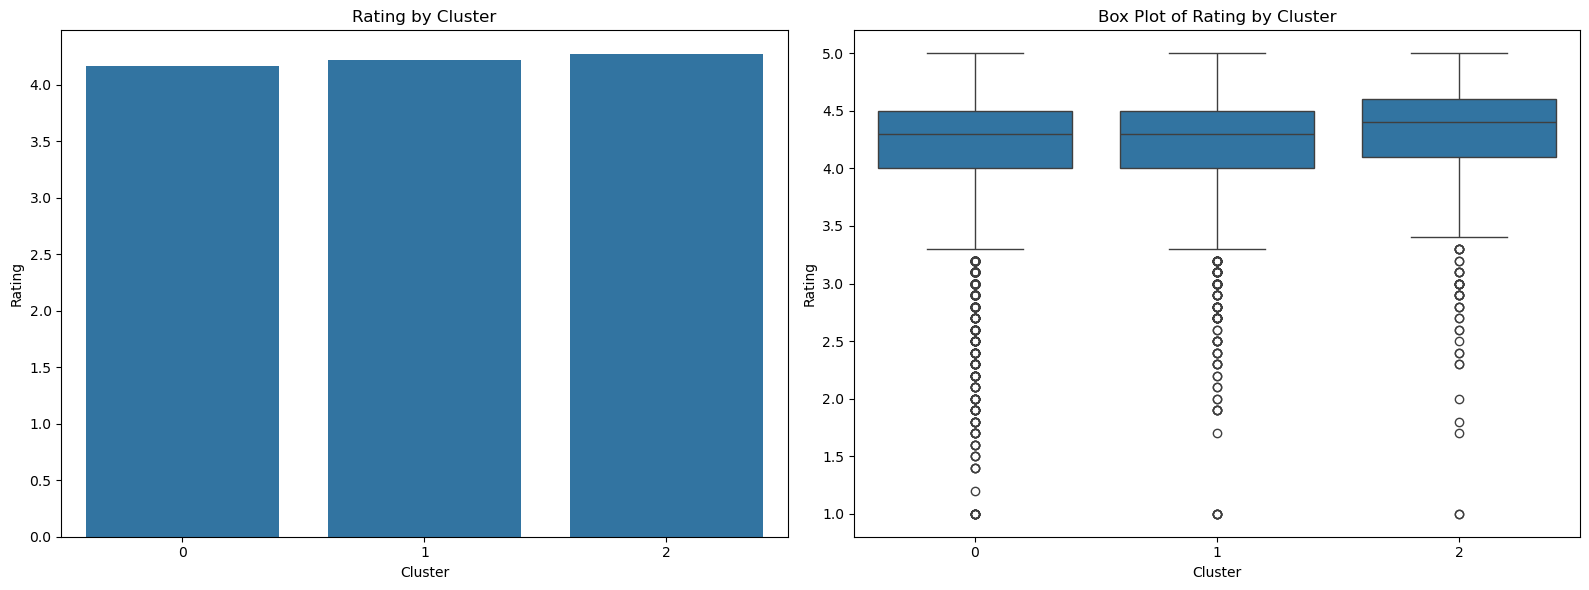

In [158]:
# Rating
# Create a figure with 2 columns
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Bar plot on the first axis
sns.barplot(x='Cluster', y='Rating', data=cluster_summary, ax=axes[0])
axes[0].set_title('Rating by Cluster')

# Box plot on the second axis
# Assume df is your original DataFrame containing the 'Reviews' and 'Cluster'
sns.boxplot(x='Cluster', y='Rating', data=df, ax=axes[1])
axes[1].set_title('Box Plot of Rating by Cluster')

# Adjust layout
plt.tight_layout()
plt.show()

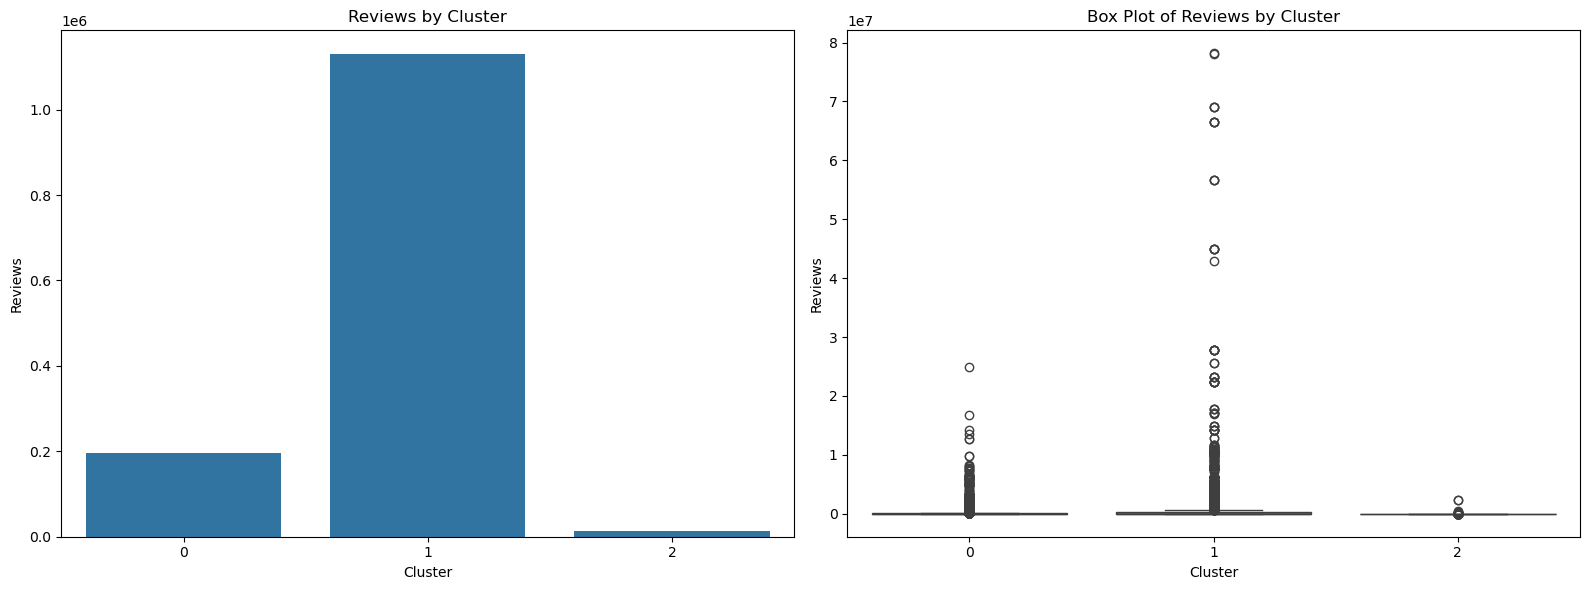

In [159]:
# Reviews
# Create a figure with 2 columns
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Bar plot on the first axis
sns.barplot(x='Cluster', y='Reviews', data=cluster_summary, ax=axes[0])
axes[0].set_title('Reviews by Cluster')

# Box plot on the second axis
sns.boxplot(x='Cluster', y='Reviews', data=df, ax=axes[1])
axes[1].set_title('Box Plot of Reviews by Cluster')

# Adjust layout
plt.tight_layout()
plt.show()

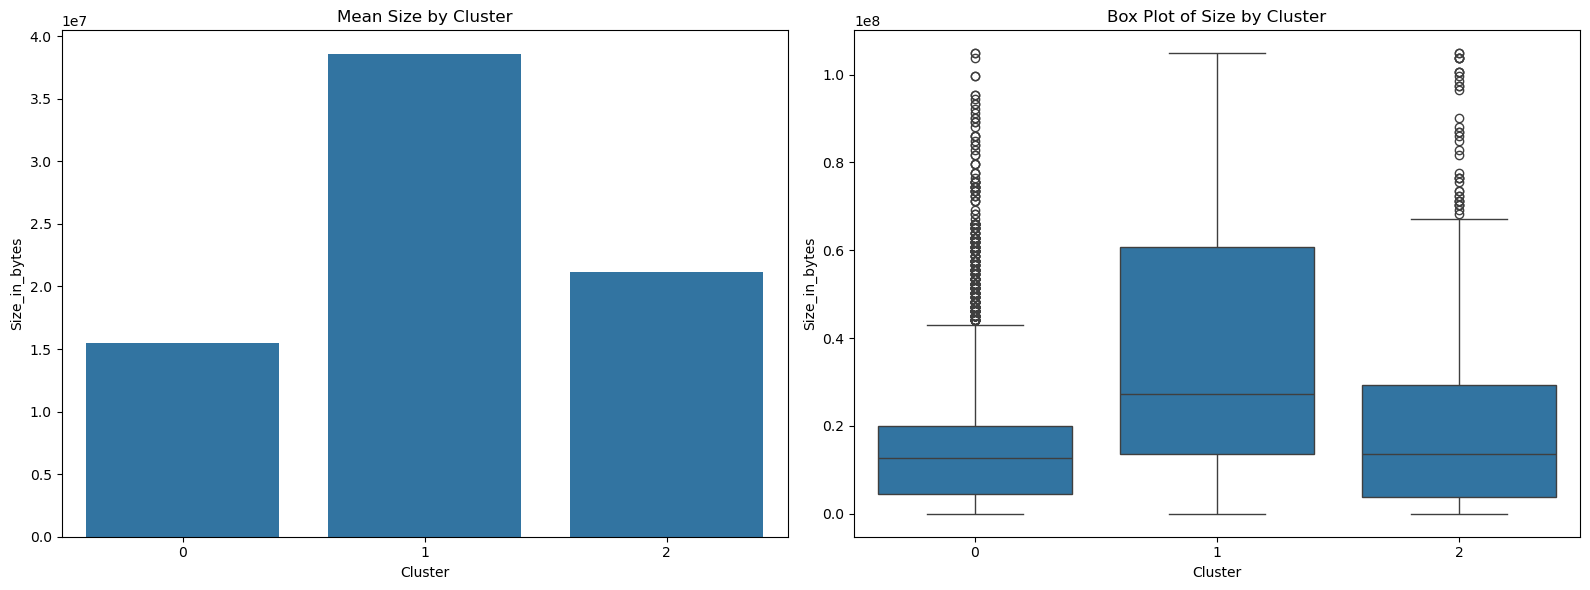

In [160]:
# Size
# Create a figure with 2 columns
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Bar plot on the first axis
sns.barplot(x='Cluster', y='Size_in_bytes', data=cluster_summary, ax=axes[0])
axes[0].set_title('Mean Size by Cluster')

# Box plot on the second axis
# Assume df is your original DataFrame containing the 'Reviews' and 'Cluster'
sns.boxplot(x='Cluster', y='Size_in_bytes', data=df, ax=axes[1])
axes[1].set_title('Box Plot of Size by Cluster')

# Adjust layout
plt.tight_layout()
plt.show()

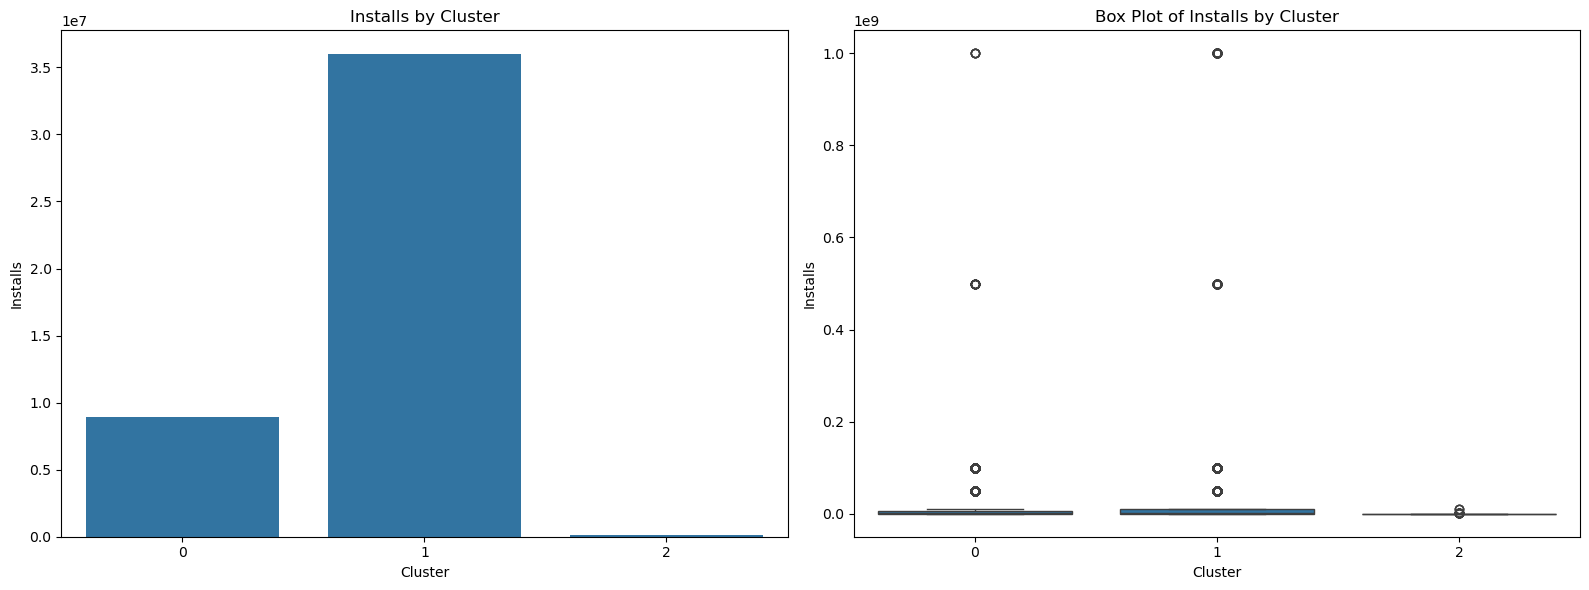

In [161]:
# Installs
# Create a figure with 2 columns
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Bar plot on the first axis
sns.barplot(x='Cluster', y='Installs', data=cluster_summary, ax=axes[0])
axes[0].set_title('Installs by Cluster')

# Box plot on the second axis
# Assume df is your original DataFrame containing the 'Reviews' and 'Cluster'
sns.boxplot(x='Cluster', y='Installs', data=df, ax=axes[1])
axes[1].set_title('Box Plot of Installs by Cluster')

# Adjust layout
plt.tight_layout()
plt.show()

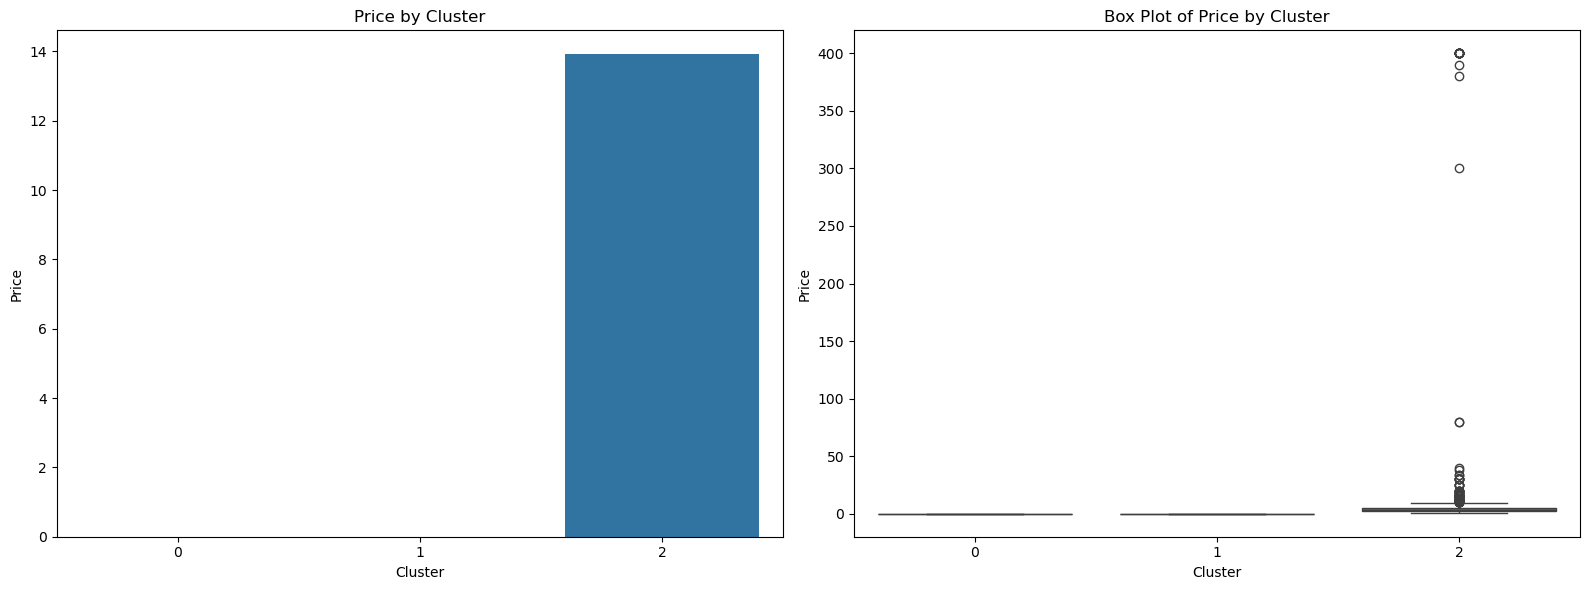

In [162]:
# Price
# Create a figure with 2 columns
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Bar plot on the first axis
sns.barplot(x='Cluster', y='Price', data=cluster_summary, ax=axes[0])
axes[0].set_title('Price by Cluster')

# Box plot on the second axis
# Assume df is your original DataFrame containing the 'Reviews' and 'Cluster'
sns.boxplot(x='Cluster', y='Price', data=df, ax=axes[1])
axes[1].set_title('Box Plot of Price by Cluster')

# Adjust layout
plt.tight_layout()
plt.show()

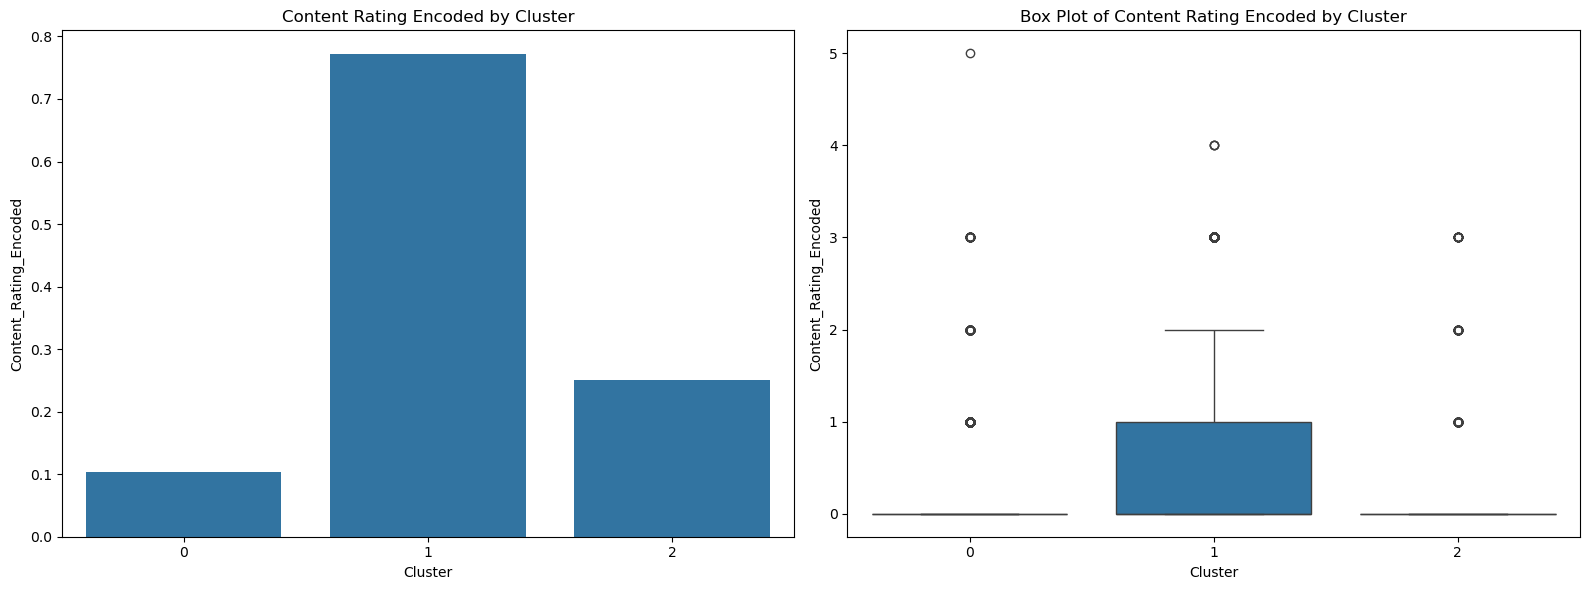

In [163]:
# Content Rating Encoded
# Create a figure with 2 columns
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Bar plot on the first axis
sns.barplot(x='Cluster', y='Content_Rating_Encoded', data=cluster_summary, ax=axes[0])
axes[0].set_title('Content Rating Encoded by Cluster')

# Box plot on the second axis
# Assume df is your original DataFrame containing the 'Reviews' and 'Cluster'
sns.boxplot(x='Cluster', y='Content_Rating_Encoded', data=df, ax=axes[1])
axes[1].set_title('Box Plot of Content Rating Encoded by Cluster')

# Adjust layout
plt.tight_layout()
plt.show()

   Cluster  Size
0        0  5406
1        1  3313
2        2   647


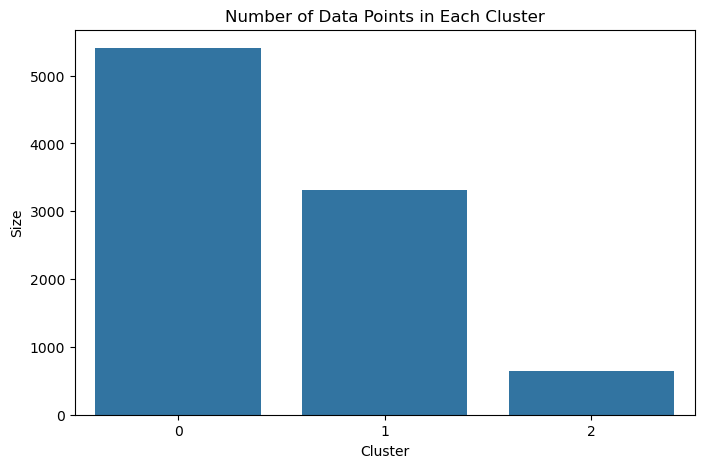

In [164]:
# Count the number of data points in each cluster to see how balanced or imbalanced the clusters are.

cluster_sizes = df['Cluster'].value_counts().reset_index()
cluster_sizes.columns = ['Cluster', 'Size']
print(cluster_sizes)

# Optional: Plot cluster sizes
plt.figure(figsize=(8, 5))
sns.barplot(x='Cluster', y='Size', data=cluster_sizes)
plt.title('Number of Data Points in Each Cluster')
plt.show()

In [165]:
# Clusters are fairly imbalanced

In [166]:
# Let's look at feature ranges
feature_ranges = df.groupby('Cluster').agg(['min', 'max']).reset_index()
print(feature_ranges)

  Cluster Rating      Reviews             Size_in_bytes              Installs  \
             min  max     min         max           min          max      min   
0       0    1.0  5.0     1.0  24900999.0        8704.0  104857600.0      1.0   
1       1    1.0  5.0     1.0  78158306.0       23552.0  104857600.0      5.0   
2       2    1.0  5.0     1.0   2376564.0       14336.0  104857600.0      1.0   

                Price  ... cat_VIDEO_PLAYERS       cat_WEATHER          Free  \
            max   min  ...               min   max         min    max    min   
0  1.000000e+09  0.00  ...             False  True       False   True   True   
1  1.000000e+09  0.00  ...             False  True       False  False   True   
2  1.000000e+07  0.99  ...             False  True       False   True  False   

           Paid        Content_Rating_Encoded      
     max    min    max                    min max  
0   True  False  False                      0   5  
1   True  False  False               

   Cluster    Rating       Reviews  Size_in_bytes      Installs      Price  \
0        0  4.167573  1.967960e+05   1.546694e+07  8.952504e+06   0.000000   
1        1  4.216601  1.129301e+06   3.854330e+07  3.596658e+07   0.000000   
2        2  4.266615  1.443277e+04   2.111958e+07  1.127397e+05  13.910433   

      Genres cat_1.9 cat_ART_AND_DESIGN cat_AUTO_AND_VEHICLES  ...  \
0  77.815020     0.0                0.0                   0.0  ...   
1  36.843948     0.0           0.017809              0.021733  ...   
2  62.939722     0.0           0.004637              0.001546  ...   

  cat_SHOPPING cat_SOCIAL cat_SPORTS cat_TOOLS cat_TRAVEL_AND_LOCAL  \
0      0.04347   0.027562   0.054569  0.123936             0.039771   
1     0.000302   0.032599   0.000604  0.000302             0.000906   
2     0.003091   0.003091   0.034003  0.097372             0.012365   

  cat_VIDEO_PLAYERS cat_WEATHER Free Paid Content_Rating_Encoded  
0          0.028487    0.012579  1.0  0.0             

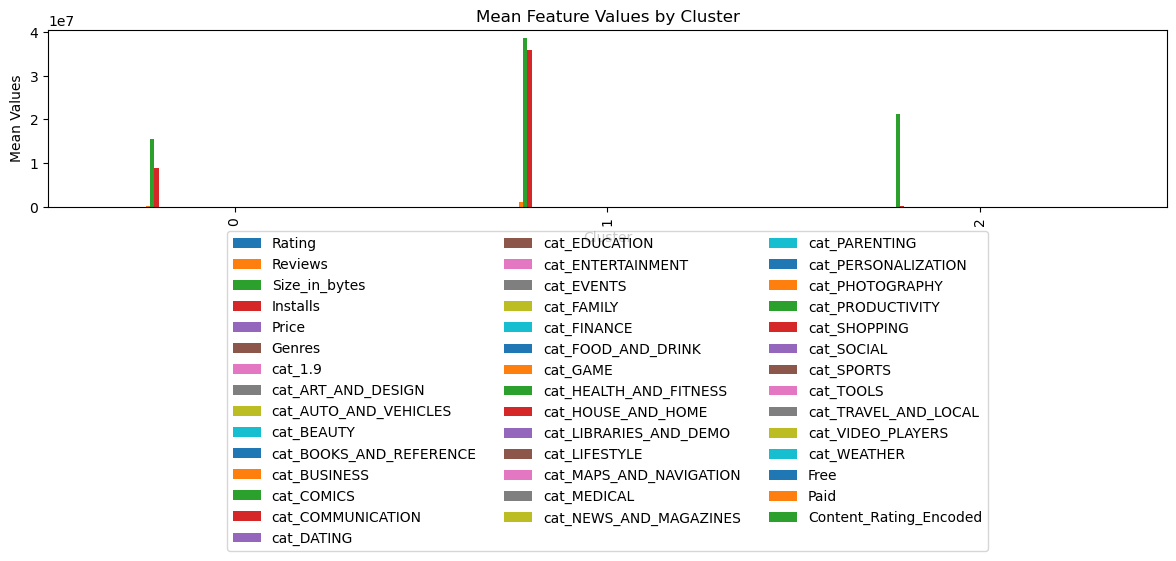

In [167]:
# Are there any dominant features in the clusters?
# Calculate mean values for features in each cluster

dominant_features = df.groupby('Cluster').mean().reset_index()
print(dominant_features)

# Optionally, plot dominant features
import matplotlib.pyplot as plt

# Plot mean values for each cluster
dominant_features.set_index('Cluster').plot(kind='bar', figsize=(12, 6))
plt.title('Mean Feature Values by Cluster')
plt.ylabel('Mean Values')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=3)
plt.tight_layout() 
plt.show()

In [168]:
# Installs and Size_in_bytes are the most dominant features in all 3 clusters (followed by Reviews)
# This could be used to determine which features to use in a supervised model

# Supervised Learning

In [170]:
# Define features and target
X_1 = df.drop(columns=['Rating'])  # features
y_1 = df['Rating']  # target variable

In [171]:
df.head().T

,0,1,2,3,4
Rating,4.1,3.9,4.7,4.5,4.3
Reviews,159.0,967.0,87510.0,215644.0,967.0
Size_in_bytes,19922944.0,14680064.0,9122611.2,26214400.0,2936012.8
Installs,10000.0,500000.0,5000000.0,50000000.0,100000.0
Price,0.0,0.0,0.0,0.0,0.0
Genres,9,11,9,9,10
cat_1.9,False,False,False,False,False
cat_ART_AND_DESIGN,True,True,True,True,True
cat_AUTO_AND_VEHICLES,False,False,False,False,False
cat_BEAUTY,False,False,False,False,False


In [172]:
# Split the data
X_1_train, X_1_test, y_1_train, y_1_test = train_test_split(X_1, y_1, test_size=0.2, random_state=42)

In [173]:
print(X_1_test.shape)
print(y_1_test.shape)

(1874, 43)
(1874,)


In [174]:
# Scale the data
scaler = StandardScaler()
X_1_scaled = scaler.fit_transform(X)
df_1_scale = pd.DataFrame(X_1_scaled, columns=X.columns)
df_1_scale.head()


,Reviews,Size_in_bytes,Installs,Price,Genres,cat_1.9,cat_ART_AND_DESIGN,cat_AUTO_AND_VEHICLES,cat_BEAUTY,cat_BOOKS_AND_REFERENCE,...,cat_SHOPPING,cat_SOCIAL,cat_SPORTS,cat_TOOLS,cat_TRAVEL_AND_LOCAL,cat_VIDEO_PLAYERS,cat_WEATHER,Free,Paid,Content_Rating_Encoded
0,-0.163458,-0.164787,-0.196063,-0.060758,-1.648499,0.0,12.250082,-0.088631,-0.067116,-0.139187,...,-0.161473,-0.168641,-0.187777,-0.291603,-0.157247,-0.131833,-0.089846,0.272407,-0.272407,-0.446808
1,-0.163201,-0.375653,-0.190692,-0.060758,-1.586635,0.0,12.250082,-0.088631,-0.067116,-0.139187,...,-0.161473,-0.168641,-0.187777,-0.291603,-0.157247,-0.131833,-0.089846,0.272407,-0.272407,-0.446808
2,-0.135673,-0.599170,-0.141368,-0.060758,-1.648499,0.0,12.250082,-0.088631,-0.067116,-0.139187,...,-0.161473,-0.168641,-0.187777,-0.291603,-0.157247,-0.131833,-0.089846,0.272407,-0.272407,-0.446808
3,-0.094917,0.088252,0.351873,-0.060758,-1.648499,0.0,12.250082,-0.088631,-0.067116,-0.139187,...,-0.161473,-0.168641,-0.187777,-0.291603,-0.157247,-0.131833,-0.089846,0.272407,-0.272407,0.829826
4,-0.163201,-0.847992,-0.195076,-0.060758,-1.617567,0.0,12.250082,-0.088631,-0.067116,-0.139187,...,-0.161473,-0.168641,-0.187777,-0.291603,-0.157247,-0.131833,-0.089846,0.272407,-0.272407,-0.446808


### Modelling

In [176]:
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, BaggingRegressor, StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

### Linear Regression

In [179]:
# Create a linear regression model
lr_model = LinearRegression()

# Fit the model to the training data
lr_model.fit(X_1_train, y_1_train)

# Make predictions on the test set
y_1_pred = lr_model.predict(X_1_test)

# Evaluate the model
mae = mean_absolute_error(y_1_test, y_1_pred)
mse = mean_squared_error(y_1_test, y_1_pred)
r2 = r2_score(y_1_test, y_1_pred)

# Print the analysis results
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")


Mean Absolute Error: 0.36
Mean Squared Error: 0.24
R-squared: 0.02


### KNN

In [183]:
# I will try KNN, but my dataset has a high dimensionality and outliers / noise, so I'm not expecting it to work very well.

In [185]:
# Create the KNN Regressor
knn_model = KNeighborsRegressor(n_neighbors=5)

# Fit the model on the training data
knn_model.fit(X_1_train, y_1_train)

# Make predictions on the test data
y_1_pred = knn_model.predict(X_1_test)

# Evaluate the model
mae = mean_absolute_error(y_1_test, y_1_pred)
mse = mean_squared_error(y_1_test, y_1_pred)
r2 = r2_score(y_1_test, y_1_pred)

# Print evaluation metrics
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Absolute Error: 0.37
Mean Squared Error: 0.28
R-squared: -0.13


In [187]:
# As expected KNN did not perform well.

### Random Forest

In [190]:
from sklearn.model_selection import GridSearchCV

In [192]:
# Create the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=0)

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200, 300, 400, 500], 
}

In [194]:
# Set up GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, 
                           param_grid=param_grid, 
                           cv=5,  # Number of cross-validation folds
                           scoring='neg_mean_squared_error',
                           n_jobs=-1,  
                           verbose=2)

In [196]:
# Fit the model
grid_search.fit(X_1_train, y_1_train)  

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=0), n_jobs=-1,
             param_grid={'n_estimators': [50, 100, 200, 300, 400, 500]},
             scoring='neg_mean_squared_error', verbose=2)

In [197]:
# Get the best parameters
best_n_estimators = grid_search.best_params_['n_estimators']
print(f"Best number of estimators: {best_n_estimators}")

Best number of estimators: 400


In [ ]:
# Predict using best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_1_test)  

In [ ]:
# Evaluate the model
mae = mean_absolute_error(y_1_test, y_1_pred)
mse = mean_squared_error(y_1_test, y_1_pred)
r2 = r2_score(y_1_test, y_1_pred)

# Print evaluation metrics
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

### Gradient Boosting

In [ ]:
# Create the model and parameter grid
gb_model = GradientBoostingRegressor(random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees
    'learning_rate': [0.01, 0.1, 0.2],  # Step size
    'max_depth': [3, 4, 5],  # Depth of each tree
    'subsample': [0.8, 1.0],  # Fraction of samples used for fitting the trees
}

In [ ]:
# Set up GridSearchCV
grid_search = GridSearchCV(estimator=gb_model, 
                           param_grid=param_grid, 
                           cv=5,  # Number of cross-validation folds
                           scoring='neg_mean_squared_error',  # Metric to evaluate
                           n_jobs=-1,  # Use all available cores
                           verbose=2)

In [ ]:
# Fit the model to training data
grid_search.fit(X_1_train, y_1_train)  

In [ ]:
# Get best parameters
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

In [ ]:
# Predict using best model
best_model = grid_search.best_estimator_
y_1_pred = best_model.predict(X_1_test)

In [ ]:
# Evaluate the model
mae = mean_absolute_error(y_1_test, y_1_pred)
mse = mean_squared_error(y_1_test, y_1_pred)
r2 = r2_score(y_1_test, y_1_pred)

# Print evaluation metrics
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

### Bagging

In [ ]:
# Create the base model
base_model = DecisionTreeRegressor()

# Create the Bagging model
bagging_model = BaggingRegressor(estimator=base_model, random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [10, 50, 100, 200],  # Number of base estimators
    'max_samples': [0.5, 0.75, 1.0],     # Proportion of samples to draw
    'max_features': [0.5, 0.75, 1.0],     # Proportion of features to draw
    'bootstrap': [True, False],           # Whether to use bootstrap samples
}

In [ ]:
# Set up GridSearchCV
grid_search = GridSearchCV(estimator=bagging_model, 
                           param_grid=param_grid, 
                           cv=5,  # Number of cross-validation folds
                           scoring='neg_mean_squared_error',  # Metric to evaluate
                           n_jobs=-1,  # Use all available cores
                           verbose=2)

In [ ]:
# Fit the model to training data
grid_search.fit(X_1_train, y_1_train)

In [ ]:
# Get best parameters
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

In [ ]:
# Predict using best model
best_model = grid_search.best_estimator_
y_1_pred = best_model.predict(X_1_test) 

In [ ]:
# Evaluate the model
mae = mean_absolute_error(y_1_test, y_1_pred)
mse = mean_squared_error(y_1_test, y_1_pred)
r2 = r2_score(y_1_test, y_1_pred)

# Print evaluation metrics
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

### Stacking

In [ ]:
# Define the base models

base_models = [
    ('rf', RandomForestRegressor(n_estimators=400, random_state=42)),
    ('gb', GradientBoostingRegressor(learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.8, random_state=42)),
    ('bag', BaggingRegressor(estimator=DecisionTreeRegressor(), bootstrap=True, max_features=0.75, max_samples=0.5, n_estimators=200, random_state=42))]

# Define the stacking regressor with a linear regression as the final estimator
stacking_model = StackingRegressor(estimators=base_models, final_estimator=LinearRegression())

# Fit the model on the training data
stacking_model.fit(X_1_train, y_1_train)

# Make predictions on the test data
y_1_pred = stacking_model.predict(X_1_test)

# Evaluate the model
mae = mean_absolute_error(y_1_test, y_1_pred)
mse = mean_squared_error(y_1_test, y_1_pred)
r2 = r2_score(y_1_test, y_1_pred)

# Print evaluation metrics
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")


# Conclusions